<a href="https://colab.research.google.com/github/iam7mza/EventClassification/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # Downloading the dataset from GitHub (uncomment when running on Colab)
# !git clone "https://github.com/iam7mza/EventClassification.git"
# !mv EventClassification/* ./
# !rm -rf EventClassification
# !rm -rf sample_data

#importing data

import loader
import numpy as np
import pandas as pd

filepath = "csv_output"
df = loader.load(filepath);
loader.clean(df); #to clean the data

df = df[df['numeric_target'] != -1]  #dropping all the unknown events

# Check unique event types and their corresponding targets
event_target_mapping = df[['event_type', 'numeric_target']].drop_duplicates().sort_values('numeric_target')
print("Event type to target mapping:")
print(event_target_mapping)

print(f'columns = {df.columns}')

Found 92 CSV files
Processing: csv_output/Wtaunu_PTV140_280_CVetoBVeto_sample1000.csv
  -> Added 1000 events (event name: Wtaunu_PTV140_280_CVetoBVeto)
Processing: csv_output/Wtaunu_PTV280_500_BFilter_sample1000.csv
  -> Added 1000 events (event name: Wtaunu_PTV280_500_BFilter)
Processing: csv_output/ZPrime1500_tt_sample1000.csv
  -> Added 1000 events (event name: ZPrime1500_tt)
Processing: csv_output/TT_directTT_500_200_sample1000.csv
  -> Added 1000 events (event name: TT_directTT_500_200)
Processing: csv_output/Zee_PTV1000_E_CMS_sample1000.csv
  -> Added 1000 events (event name: Zee_PTV1000_E_CMS)
Processing: csv_output/Zmumu_PTV140_280_CFilterBVeto_sample1000.csv
  -> Added 1000 events (event name: Zmumu_PTV140_280_CFilterBVeto)
Processing: csv_output/single_top_wtchan_sample1000.csv
  -> Added 1000 events (event name: single_top_wtchan)
Processing: csv_output/Zee_sample1000.csv
  -> Added 1000 events (event name: Zee)
Processing: csv_output/Ztautau_PTV1000_E_CMS_sample1000.csv
  -

In [2]:
# the chosen ones
TheChosenOnes = ['trigE', 'trigM', 'trigP', 'lep_n','lep_pt', 'lep_eta', 'lep_phi',
       'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID',
       'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased',
       'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_n', 'jet_pt',
       'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt','jet_MV2c10', 'photon_n','photon_pt', 'photon_eta', 'photon_phi',
       'photon_E', 'photon_isTightID', 'photon_ptcone30', 'photon_etcone20',
       'photon_convType', 'largeRjet_n', 'largeRjet_pt', 'largeRjet_eta',
       'largeRjet_phi', 'largeRjet_E', 'largeRjet_m','largeRjet_D2', 'largeRjet_tau32', 'tau_n', 'tau_pt', 'tau_eta',
       'tau_phi', 'tau_E', 'tau_charge', 'tau_isTightID', 'tau_nTracks', 'tau_BDTid', 'ditau_m', 'lep_pt_syst',
       'met_et_syst', 'jet_pt_syst', 'photon_pt_syst', 'largeRjet_pt_syst',
       'tau_pt_syst']


#df[TheChosenOnes]

#extracting the features for lists (only first two elements)

#TODO: Turn into a function and make the number of cols an arg
# Separate list and scalar columns

def extract_list_features(df, list_cols, scalar_cols, n_elements=2):
    """
    Extract features from list columns with configurable number of elements.

    Parameters:
    df: DataFrame containing the data
    list_cols: List of column names that contain lists
    scalar_cols: List of column names that contain scalar values
    n_elements: Number of elements to extract from each list (max 5)

    Returns:
    DataFrame with extracted features
    """
    # Ensure n_elements is within valid range
    n_elements = min(max(n_elements, 1), 5)

    # Element names for readability
    element_names = ['first', 'second', 'third', 'fourth', 'fifth']

    extracted_data = {}

    # Add scalar columns
    for col in scalar_cols:
        extracted_data[col] = df[col]

    # Add list-derived columns
    for col in list_cols:
        for i in range(n_elements):
            col_name = f'{col}_{element_names[i]}'
            extracted_data[col_name] = df[col].apply(
                lambda x: x[i] if len(x) > i else np.nan
            )

    return pd.DataFrame(extracted_data)

# Usage with configurable number of elements
n_elements = 5  # Change this to extract 1-5 elements from each list

# Separate list and scalar columns
list_cols = []
scalar_cols = []

for col in TheChosenOnes:
    if col in df.columns:
        if isinstance(df[col].iloc[0], list):  # Use iloc[0] instead of [0]
            list_cols.append(col)
        else:
            scalar_cols.append(col)

print(f"List columns: {len(list_cols)}")
print(f"Scalar columns: {len(scalar_cols)}")
print(f"Extracting {n_elements} elements from each list column")

# Extract features with specified number of elements
df_extracted = extract_list_features(df, list_cols, scalar_cols, n_elements)

print(f"Shape after feature extraction: {df_extracted.shape}")

# Drop columns that are all zeros or nan
columns_to_drop = []
for col in df_extracted.columns:
    if df_extracted[col].isna().all():  # nan check
        columns_to_drop.append(col)
        print(f"Column {col} is all NaN, will drop it.")
    elif (df_extracted[col] == 0).all():  # zero check
        columns_to_drop.append(col)
        print(f"Column {col} is all zeros, will drop it.")


# Drop all NaN columns at once
if columns_to_drop:
    df_extracted = df_extracted.drop(columns=columns_to_drop)
    print(f"Dropped {len(columns_to_drop)} NaN columns")

print(f"Final shape: {df_extracted.shape}")
df_extracted

List columns: 46
Scalar columns: 12
Extracting 5 elements from each list column
Shape after feature extraction: (80000, 242)
Column trigP is all zeros, will drop it.
Column photon_n is all zeros, will drop it.
Column tau_n is all zeros, will drop it.
Column ditau_m is all zeros, will drop it.
Column lep_pt_fifth is all NaN, will drop it.
Column lep_eta_fifth is all NaN, will drop it.
Column lep_phi_fifth is all NaN, will drop it.
Column lep_E_fifth is all NaN, will drop it.
Column lep_z0_fifth is all NaN, will drop it.
Column lep_charge_fifth is all NaN, will drop it.
Column lep_type_fifth is all NaN, will drop it.
Column lep_isTightID_fifth is all NaN, will drop it.
Column lep_ptcone30_fifth is all NaN, will drop it.
Column lep_etcone20_fifth is all NaN, will drop it.
Column lep_trackd0pvunbiased_fifth is all NaN, will drop it.
Column lep_tracksigd0pvunbiased_fifth is all NaN, will drop it.
Column photon_pt_first is all zeros, will drop it.
Column photon_pt_second is all zeros, will d

trigE  trigM  lep_n     met_et   met_phi  jet_n  largeRjet_n  \
0          1      0      1   24384.90  2.320400      2            1   
1          0      1      1  237930.00 -2.133460      1            1   
2          1      0      1  208198.00 -1.976610      2            1   
3          0      1      1  230894.00 -1.423400      1            1   
4          0      1      1  211760.00  2.470310      1            1   
...      ...    ...    ...        ...       ...    ...          ...   
91995      0      1      2    9092.94  1.245910      6            2   
91996      0      1      2   69305.20  1.151870      3            2   
91997      0      1      2   67272.80 -2.494600      6            2   
91998      0      1      2  111414.00  1.580380      6            1   
91999      0      1      2   56998.40  0.626345      2            1   

       met_et_syst  lep_pt_first  lep_pt_second  ...  jet_pt_syst_first  \
0          2242.69      245321.0            0.0  ...            6109.66   
1         15707.70       39355.7            0.0  ...           16131.40   
2         11325.70       68014.3            0.0  ...           15391.80   
3         25899.90       51327.8            0.0  ...           10388.50   
4         12714.40       40109.7            0.0  ...           13011.80   
...            ...           ...            ...  ...                ...   
91995      3593.22       63538.7        50036.1  ...           33532.00   
91996     20409.20      118758.0        14310.4  ...           11283.50   
91997      8455.48      131488.0        39330.6  ...           13547.10   
91998     23149.70      689621.0        70019.6  ...           15452.20   
91999     25161.30      819798.0       159566.0  ...           29539.50   

       jet_pt_syst_second  jet_pt_syst_third  jet_pt_syst_fourth  \
0                 2291.37                NaN                 NaN   
1                    0.00                NaN                 NaN   
2                 3237.42                NaN                 NaN   
3                    0.00                NaN                 NaN   
4                    0.00                NaN                 NaN   
...                   ...                ...                 ...   
91995            10111.30            7996.89             2479.86   
91996             7193.64            5097.09                 NaN   
91997            23470.60            3219.74             5997.92   
91998            11654.70           12698.30             8118.28   
91999             2108.78                NaN                 NaN   

       jet_pt_syst_fifth  largeRjet_pt_syst_first  largeRjet_pt_syst_second  \
0                    NaN                 8803.120                      0.00   
1                    NaN                    0.000                      0.00   
2                    NaN                  473.531                      0.00   
3                    NaN                 6789.250                      0.00   
4                    NaN                 1539.520                      0.00   
...                  ...                      ...                       ...   
91995            1626.69                14038.000                   9563.00   
91996                NaN                17600.600                   4570.03   
91997            2565.02                49906.100                  21434.00   
91998            6397.66                71688.600                      0.00   
91999                NaN                23536.700                      0.00   

       largeRjet_pt_syst_third  largeRjet_pt_syst_fourth  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                          NaN                       NaN   
4                          NaN                       NaN   
...                        ...                       ...   
91995                      NaN                       NaN   
91996  

In [3]:
df['lep_pt']

0               [245321, 0]
1              [39355.7, 0]
2              [68014.3, 0]
3              [51327.8, 0]
4              [40109.7, 0]
                ...        
91995    [63538.7, 50036.1]
91996     [118758, 14310.4]
91997     [131488, 39330.6]
91998     [689621, 70019.6]
91999      [819798, 159566]
Name: lep_pt, Length: 80000, dtype: object

In [4]:
df_extracted.isna()

trigE  trigM  lep_n  met_et  met_phi  jet_n  largeRjet_n  met_et_syst  \
0      False  False  False   False    False  False        False        False   
1      False  False  False   False    False  False        False        False   
2      False  False  False   False    False  False        False        False   
3      False  False  False   False    False  False        False        False   
4      False  False  False   False    False  False        False        False   
...      ...    ...    ...     ...      ...    ...          ...          ...   
91995  False  False  False   False    False  False        False        False   
91996  False  False  False   False    False  False        False        False   
91997  False  False  False   False    False  False        False        False   
91998  False  False  False   False    False  False        False        False   
91999  False  False  False   False    False  False        False        False   

       lep_pt_first  lep_pt_second  ...  jet_pt_syst_first  \
0             False          False  ...              False   
1             False          False  ...              False   
2             False          False  ...              False   
3             False          False  ...              False   
4             False          False  ...              False   
...             ...            ...  ...                ...   
91995         False          False  ...              False   
91996         False          False  ...              False   
91997         False          False  ...              False   
91998         False          False  ...              False   
91999         False          False  ...              False   

       jet_pt_syst_second  jet_pt_syst_third  jet_pt_syst_fourth  \
0                   False               True                True   
1                   False               True                True   
2                   False               True                True   
3                   False               True                True   
4                   False               True                True   
...                   ...                ...                 ...   
91995               False              False               False   
91996               False              False                True   
91997               False              False               False   
91998               False              False               False   
91999               False               True                True   

       jet_pt_syst_fifth  largeRjet_pt_syst_first  largeRjet_pt_syst_second  \
0                   True                    False                     False   
1                   True                    False                     False   
2                   True                    False                     False   
3                   True                    False                     False   
4                   True                    False                     False   
...                  ...                      ...                       ...   
91995              False                    False                     False   
91996               True                    False                     False   
91997              False                    False                     False   
91998              False                    False                     False   
91999               True                    False                     False   

       largeRjet_pt_syst_third  largeRjet_pt_syst_fourth  \
0                         True                      True   
1                         True                      True   
2                         True                      True   
3                         True                      True   
4                         True                      True   
...                        ...                       ...   
91995                     True                      True   
91996                     True                      Tru

TODO: MCWEIGHT, DROPOUT AND DONT FORGET TO HAVE FUN

In [5]:
# First, let's see what columns with _first we have
first_cols = [col for col in df_extracted.columns if '_first' in col]
print("Columns with '_first':")
print(first_cols)

# Features to compute TOTAL (sum)
total_base_features = ['lep_pt', 'lep_E', 'lep_charge', 'lep_ptcone30', 'lep_etcone20',
                      'jet_pt', 'jet_E', 'largeRjet_pt', 'largeRjet_E', 'largeRjet_m']

# Features to compute MEAN (average)
mean_base_features = ['lep_eta', 'lep_phi', 'lep_z0', 'jet_eta', 'jet_phi',
                     'largeRjet_eta', 'largeRjet_phi', 'lep_pt_syst', 'jet_pt_syst',
                     'largeRjet_pt_syst']

element_indicators = ['_first', '_second', '_third', '_fourth', '_fifth']

print("\nCreating TOTAL columns:")
# Create total columns
for base_feature in total_base_features:
    feature_cols = []
    for indicator in element_indicators:
        col_name = f'{base_feature}{indicator}'
        if col_name in df_extracted.columns:
            feature_cols.append(col_name)

    if len(feature_cols) > 0:
        total_col_name = f'{base_feature}_total'
        df_extracted[total_col_name] = df_extracted[feature_cols].sum(axis=1)
        print(f"  {total_col_name} from {len(feature_cols)} columns: {feature_cols}")

print("\nCreating MEAN columns:")
# Create mean columns
for base_feature in mean_base_features:
    feature_cols = []
    for indicator in element_indicators:
        col_name = f'{base_feature}{indicator}'
        if col_name in df_extracted.columns:
            feature_cols.append(col_name)

    if len(feature_cols) > 0:
        mean_col_name = f'{base_feature}_mean'
        # Calculate mean excluding zeros to avoid bias from missing particles

        ##TODO: Im not sure if replacing 0 with NaN is the best way to calculate mean here
        df_extracted[mean_col_name] = df_extracted[feature_cols].replace(0, np.nan).mean(axis=1, skipna=True).fillna(0)
        print(f"  {mean_col_name} from {len(feature_cols)} columns: {feature_cols}")

print(f"\nShape after adding totals and means: {df_extracted.shape}")

# Show new columns created
new_total_cols = [col for col in df_extracted.columns if '_total' in col]
new_mean_cols = [col for col in df_extracted.columns if '_mean' in col]
print(f"Added {len(new_total_cols)} total columns and {len(new_mean_cols)} mean columns")
print(f"Total columns: {new_total_cols}")
print(f"Mean columns: {new_mean_cols}")


Columns with '_first':
['lep_pt_first', 'lep_eta_first', 'lep_phi_first', 'lep_E_first', 'lep_z0_first', 'lep_charge_first', 'lep_type_first', 'lep_isTightID_first', 'lep_ptcone30_first', 'lep_etcone20_first', 'lep_trackd0pvunbiased_first', 'lep_tracksigd0pvunbiased_first', 'jet_pt_first', 'jet_eta_first', 'jet_phi_first', 'jet_E_first', 'jet_jvt_first', 'jet_MV2c10_first', 'largeRjet_pt_first', 'largeRjet_eta_first', 'largeRjet_phi_first', 'largeRjet_E_first', 'largeRjet_m_first', 'largeRjet_D2_first', 'largeRjet_tau32_first', 'lep_pt_syst_first', 'jet_pt_syst_first', 'largeRjet_pt_syst_first']

Creating TOTAL columns:
  lep_pt_total from 4 columns: ['lep_pt_first', 'lep_pt_second', 'lep_pt_third', 'lep_pt_fourth']
  lep_E_total from 4 columns: ['lep_E_first', 'lep_E_second', 'lep_E_third', 'lep_E_fourth']
  lep_charge_total from 4 columns: ['lep_charge_first', 'lep_charge_second', 'lep_charge_third', 'lep_charge_fourth']
  lep_ptcone30_total from 4 columns: ['lep_ptcone30_first', 'le

##**Feature Selection**

In [6]:
#TODO: create cols with total values (for pt, E, et, etc.) such that when some cols are dropped, the total still exists

percentlim = 0.1  # 10% limit
nan_fraction = df_extracted.isna().mean(axis=0)  # Fraction of NaN values per column
high_nan_cols = nan_fraction[nan_fraction > percentlim].index.tolist()
print(f'{len(high_nan_cols)} cols are more than {percentlim*100:.0f}% NaN out of {len(df_extracted.columns)}')
print("NaN fractions per column:")
for col, frac in zip(df_extracted.columns, nan_fraction):
    if frac > 0:  # Only show columns with some NaN values
        print(f"  {col}: {frac*100:.1f}%")

df_extracted = df_extracted.drop(high_nan_cols, axis=1)
print(f'Columns remaining after dropping high-NaN columns: {len(df_extracted.columns)}')

df_extracted

71 cols are more than 10% NaN out of 155
NaN fractions per column:
  lep_pt_third: 97.4%
  lep_pt_fourth: 100.0%
  lep_eta_third: 97.4%
  lep_eta_fourth: 100.0%
  lep_phi_third: 97.4%
  lep_phi_fourth: 100.0%
  lep_E_third: 97.4%
  lep_E_fourth: 100.0%
  lep_z0_third: 97.4%
  lep_z0_fourth: 100.0%
  lep_charge_third: 97.4%
  lep_charge_fourth: 100.0%
  lep_type_third: 97.4%
  lep_type_fourth: 100.0%
  lep_isTightID_third: 97.4%
  lep_isTightID_fourth: 100.0%
  lep_ptcone30_third: 97.4%
  lep_ptcone30_fourth: 100.0%
  lep_etcone20_third: 97.4%
  lep_etcone20_fourth: 100.0%
  lep_trackd0pvunbiased_third: 97.4%
  lep_trackd0pvunbiased_fourth: 100.0%
  lep_tracksigd0pvunbiased_third: 97.4%
  lep_tracksigd0pvunbiased_fourth: 100.0%
  jet_pt_third: 41.1%
  jet_pt_fourth: 61.1%
  jet_pt_fifth: 75.5%
  jet_eta_third: 41.1%
  jet_eta_fourth: 61.1%
  jet_eta_fifth: 75.5%
  jet_phi_third: 41.1%
  jet_phi_fourth: 61.1%
  jet_phi_fifth: 75.5%
  jet_E_third: 41.1%
  jet_E_fourth: 61.1%
  jet_E_fifth

trigE  trigM  lep_n     met_et   met_phi  jet_n  largeRjet_n  \
0          1      0      1   24384.90  2.320400      2            1   
1          0      1      1  237930.00 -2.133460      1            1   
2          1      0      1  208198.00 -1.976610      2            1   
3          0      1      1  230894.00 -1.423400      1            1   
4          0      1      1  211760.00  2.470310      1            1   
...      ...    ...    ...        ...       ...    ...          ...   
91995      0      1      2    9092.94  1.245910      6            2   
91996      0      1      2   69305.20  1.151870      3            2   
91997      0      1      2   67272.80 -2.494600      6            2   
91998      0      1      2  111414.00  1.580380      6            1   
91999      0      1      2   56998.40  0.626345      2            1   

       met_et_syst  lep_pt_first  lep_pt_second  ...  lep_eta_mean  \
0          2242.69      245321.0            0.0  ...      1.094570   
1         15707.70       39355.7            0.0  ...      1.942800   
2         11325.70       68014.3            0.0  ...      1.709110   
3         25899.90       51327.8            0.0  ...      0.488266   
4         12714.40       40109.7            0.0  ...      1.945180   
...            ...           ...            ...  ...           ...   
91995      3593.22       63538.7        50036.1  ...     -1.969555   
91996     20409.20      118758.0        14310.4  ...     -0.068375   
91997      8455.48      131488.0        39330.6  ...     -0.302947   
91998     23149.70      689621.0        70019.6  ...      0.525356   
91999     25161.30      819798.0       159566.0  ...      0.117600   

       lep_phi_mean  lep_z0_mean  jet_eta_mean  jet_phi_mean  \
0          1.440310     0.051762      0.195189     -1.976090   
1         -2.159680    -0.031816      1.191030      1.035810   
2         -1.630620     0.055945      0.067170      0.848954   
3         -1.239890    -0.036573      0.975995      1.757060   
4          2.495610    -0.052513      0.426205     -0.641631   
...             ...          ...           ...           ...   
91995      0.636180     0.011535     -0.921390     -0.100585   
91996     -0.377752     0.023547     -0.127803      0.426242   
91997      2.605710     0.027370     -1.004852     -0.522050   
91998      2.070670     0.031548     -0.824590      0.397442   
91999      0.560494    -0.053066     -1.358345     -1.797525   

       largeRjet_eta_mean  largeRjet_phi_mean  lep_pt_syst_mean  \
0                1.119150            1.437520        2731.65000   
1                1.198880            1.035170         293.54300   
2                1.385870            1.345050         755.15300   
3                0.982887            1.759800         538.19300   
4                0.408605           -0.637559         173.56200   
...                   ...                 ...               ...   
91995           -0.876932           -0.609320         370.45000   
91996           -0.083679           -0.689808        3341.07750   
91997           -0.990711           -0.741261         865.97185   
91998           -0.561910           -1.387220       34501.89350   
91999           -0.487754           -2.568360       13302.94000   

       jet_pt_syst_mean  largeRjet_pt_syst_mean  
0           4200.515000                8803.120  
1          16131.400000                   0.000  
2           9314.610000                 473.531  
3          10388.500000                6789.250  
4          13011.800000                1539.520  
...                 ...                     ...  
91995      11149.348000               11800.500  
91996       7858.076667               11085.315  
91997       9760.076000               35670.050  
91998      10864.228000               71688.600  
91999      15824.140000               23536.700  

[80000 rows x 84 columns]

In [7]:
#Dropping nan rows (if they exist)

nan_counts = df_extracted.isna().sum()
columns_with_nan = nan_counts[nan_counts > 0]
print(f"Columns with NaN values ({len(columns_with_nan)} out of {len(nan_counts)}):")
if len(columns_with_nan) > 0:
    for col, count in columns_with_nan.items():
        print(f"  {col}: {count}")
else:
    print("No columns have NaN values! YIPPIEEE!!")

# FIXED: Drop the same rows from both features AND targets
print(f"Shape before dropping NaN rows: {df_extracted.shape}")
rows_before = len(df_extracted)

# Get mask for rows WITHOUT any NaN values
valid_rows_mask = ~df_extracted.isna().any(axis=1)

# Apply the same mask to BOTH dataframes
df_extracted = df_extracted[valid_rows_mask]
df = df[valid_rows_mask]  # Drop same rows from targets!

rows_after = len(df_extracted)
print(f"Shape after dropping NaN rows: {df_extracted.shape}")
print(f"Dropped {rows_before - rows_after} rows with NaN values")
print(f"Target dataframe shape: {df.shape}")

# Verify alignment
print(f"Features and targets are aligned: {len(df_extracted) == len(df)}")

Columns with NaN values (0 out of 84):
No columns have NaN values! YIPPIEEE!!
Shape before dropping NaN rows: (80000, 84)
Shape after dropping NaN rows: (80000, 84)
Dropped 0 rows with NaN values
Target dataframe shape: (80000, 86)
Features and targets are aligned: True


## **Plotting the features**

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dataframe_histograms(df, title="Feature Histograms", figsize=(20, 5),
                             cols_per_row=4, bins=50, show_stats=True,
                             save_path=None):
    """
    Create histograms for all columns in a DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame to plot
    title : str
        Main title for the plots
    figsize : tuple
        Base figure size (width, height per row)
    cols_per_row : int
        Number of columns per row in subplot grid
    bins : int
        Number of bins for histograms
    show_stats : bool
        Whether to show mean and std on each plot
    save_path : str, optional
        If provided, save the plot to this path

    Returns:
    --------
    fig : matplotlib.figure.Figure
        The figure object
    """

    # Calculate subplot grid dimensions
    n_features = len(df.columns)
    n_rows = (n_features + cols_per_row - 1) // cols_per_row  # Round up
    n_subplot_cols = min(cols_per_row, n_features)

    # Create figure
    fig, axes = plt.subplots(n_rows, n_subplot_cols,
                            figsize=(figsize[0], figsize[1] * n_rows))
    fig.suptitle(title, fontsize=16, y=0.98)

    # Handle different axes configurations
    if n_rows > 1:
        axes = axes.flatten()
    elif n_rows == 1 and n_subplot_cols > 1:
        axes = axes
    else:
        axes = [axes]

    # Plot histogram for each column
    for i, col in enumerate(df.columns):
        if i < len(axes):
            ax = axes[i]

            # Get data and clean it
            data = df[col].replace([np.inf, -np.inf], np.nan).dropna()

            # Skip if no valid data
            if len(data) == 0:
                ax.text(0.5, 0.5, 'No valid data', transform=ax.transAxes,
                       ha='center', va='center', fontsize=12)
                ax.set_title(f'{col}', fontsize=10)
                continue

            # Create histogram
            ax.hist(data, bins=bins, alpha=0.8, color='steelblue',
                   edgecolor='black', linewidth=0.5)
            ax.set_title(f'{col}', fontsize=10)
            ax.set_xlabel('Value', fontsize=8)
            ax.set_ylabel('Frequency', fontsize=8)
            ax.grid(True, alpha=0.3)

            # Add statistics if requested
            if show_stats:
                stats_text = f'Count: {len(data)}\nMean: {data.mean():.3f}\nStd: {data.std():.3f}'
                ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
                       verticalalignment='top', fontsize=8,
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Hide unused subplots
    for i in range(len(df.columns), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()

    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {save_path}")

    plt.show()

    # Print summary
    print(f"Created histograms for {len(df.columns)} features")
    print(f"Data shape: {df.shape}")


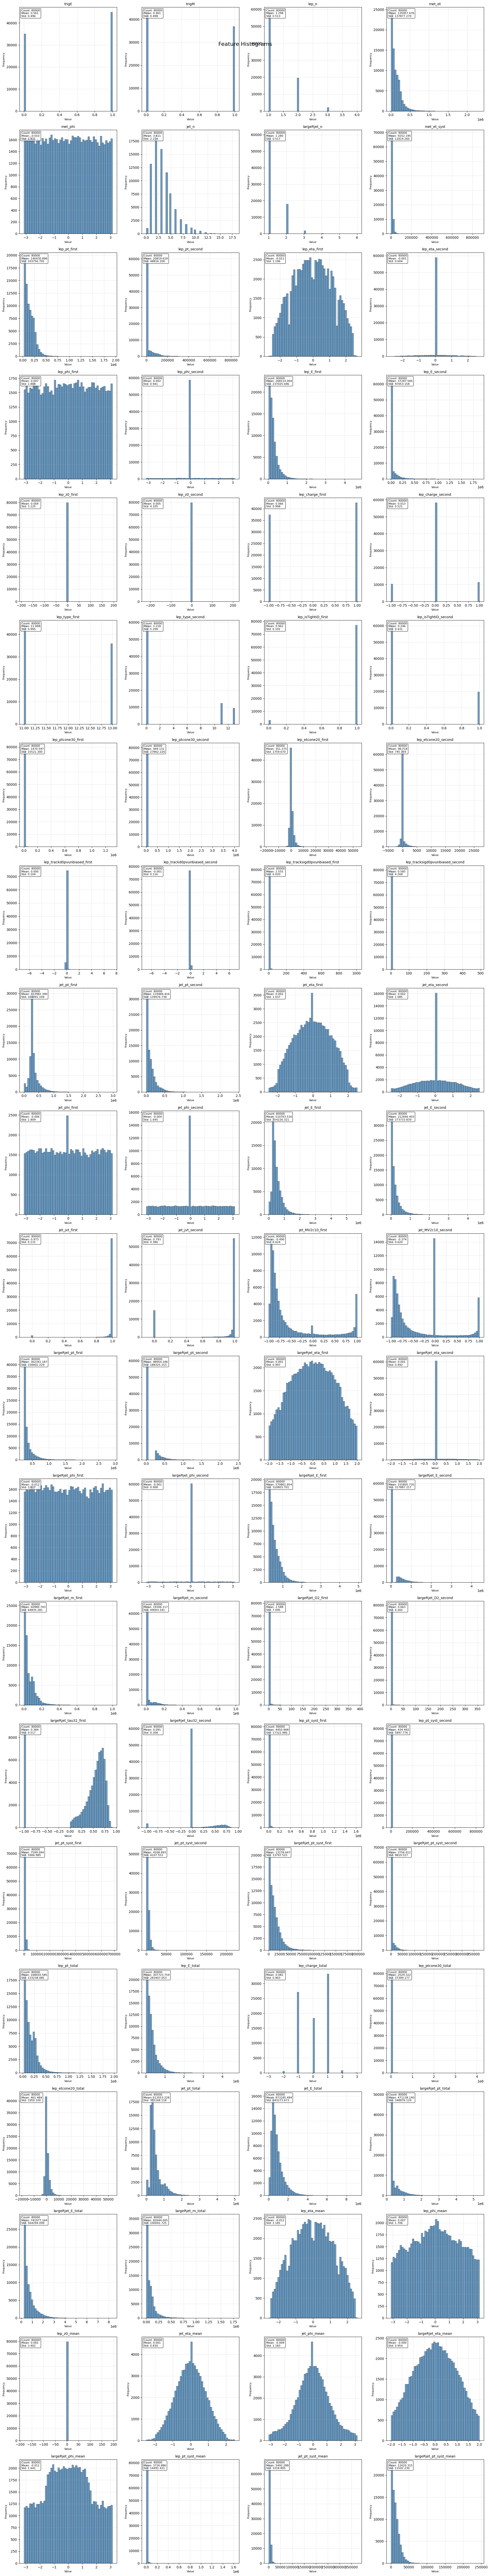

Created histograms for 84 features
Data shape: (80000, 84)


In [9]:
plot_dataframe_histograms(df_extracted)

# what is lep_z0?
# what is lep_trackd0pvunbiased?
# what is lep_tracksigd0pvunbiased?
# whats jet_jvt?

#why does lep_type look weird?



## **Trying different scalings**

In [23]:
# Apply log transformation to positive-only features that need it !!!!!!!!!!!!!!!!!!!!!!!!!!!!
from sklearn.preprocessing import PowerTransformer

# For right-skewed physics variables (pt, energy, etc.)

# features that need to be log scaled:
# met_et, met_et_syst, all lep_pt, all jet_pt, all lep_E, lep_etcone20 (mayble),
#  all jet_E, all largeRjet_pt, all largeRjet_E, all largeRjet_m, all lep_pt_syst,
#  alljet_pt_syst, all largeRjet_pt_syst

# Even safer approach - only transform positive-skewed variables
physics_vars = [col for col in df_extracted.columns if any(x in col.lower() for x in ['_pt', '_e_', '_etcone', '_m', 'met_et'])]

df_preprocessed = df_extracted.copy()

for col in physics_vars:
    if col in df_preprocessed.columns:
        # Only apply log transform if:
        # 1. All values are non-negative OR
        # 2. We can safely shift them
        
        data = df_preprocessed[col]
        
        if data.min() >= 0:
            # Safe to apply log1p directly
            df_preprocessed[col] = np.log1p(data)
        elif data.min() >= -1:
            # Values between -1 and 0, log1p might still work
            # But let's be extra safe
            df_preprocessed[col] = np.log1p(np.maximum(data, 0))  # Clip negatives to 0
        else:
            # Values < -1, need to shift
            shift = abs(data.min()) + 1e-6
            df_preprocessed[col] = np.log1p(data + shift)
        
        print(f"Transformed {col}: {df_preprocessed[col].isna().sum()} NaNs")

X = df_preprocessed

Transformed met_et: 0 NaNs
Transformed met_et_syst: 0 NaNs
Transformed lep_pt_first: 0 NaNs
Transformed lep_pt_second: 0 NaNs
Transformed lep_E_first: 0 NaNs
Transformed lep_E_second: 0 NaNs
Transformed lep_ptcone30_first: 0 NaNs
Transformed lep_ptcone30_second: 0 NaNs
Transformed lep_etcone20_first: 0 NaNs
Transformed lep_etcone20_second: 0 NaNs
Transformed jet_pt_first: 0 NaNs
Transformed jet_pt_second: 0 NaNs
Transformed jet_E_first: 0 NaNs
Transformed jet_E_second: 0 NaNs
Transformed jet_MV2c10_first: 0 NaNs
Transformed jet_MV2c10_second: 0 NaNs
Transformed largeRjet_pt_first: 0 NaNs
Transformed largeRjet_pt_second: 0 NaNs
Transformed largeRjet_E_first: 0 NaNs
Transformed largeRjet_E_second: 0 NaNs
Transformed largeRjet_m_first: 0 NaNs
Transformed largeRjet_m_second: 0 NaNs
Transformed lep_pt_syst_first: 0 NaNs
Transformed lep_pt_syst_second: 0 NaNs
Transformed jet_pt_syst_first: 0 NaNs
Transformed jet_pt_syst_second: 0 NaNs
Transformed largeRjet_pt_syst_first: 0 NaNs
Transformed l

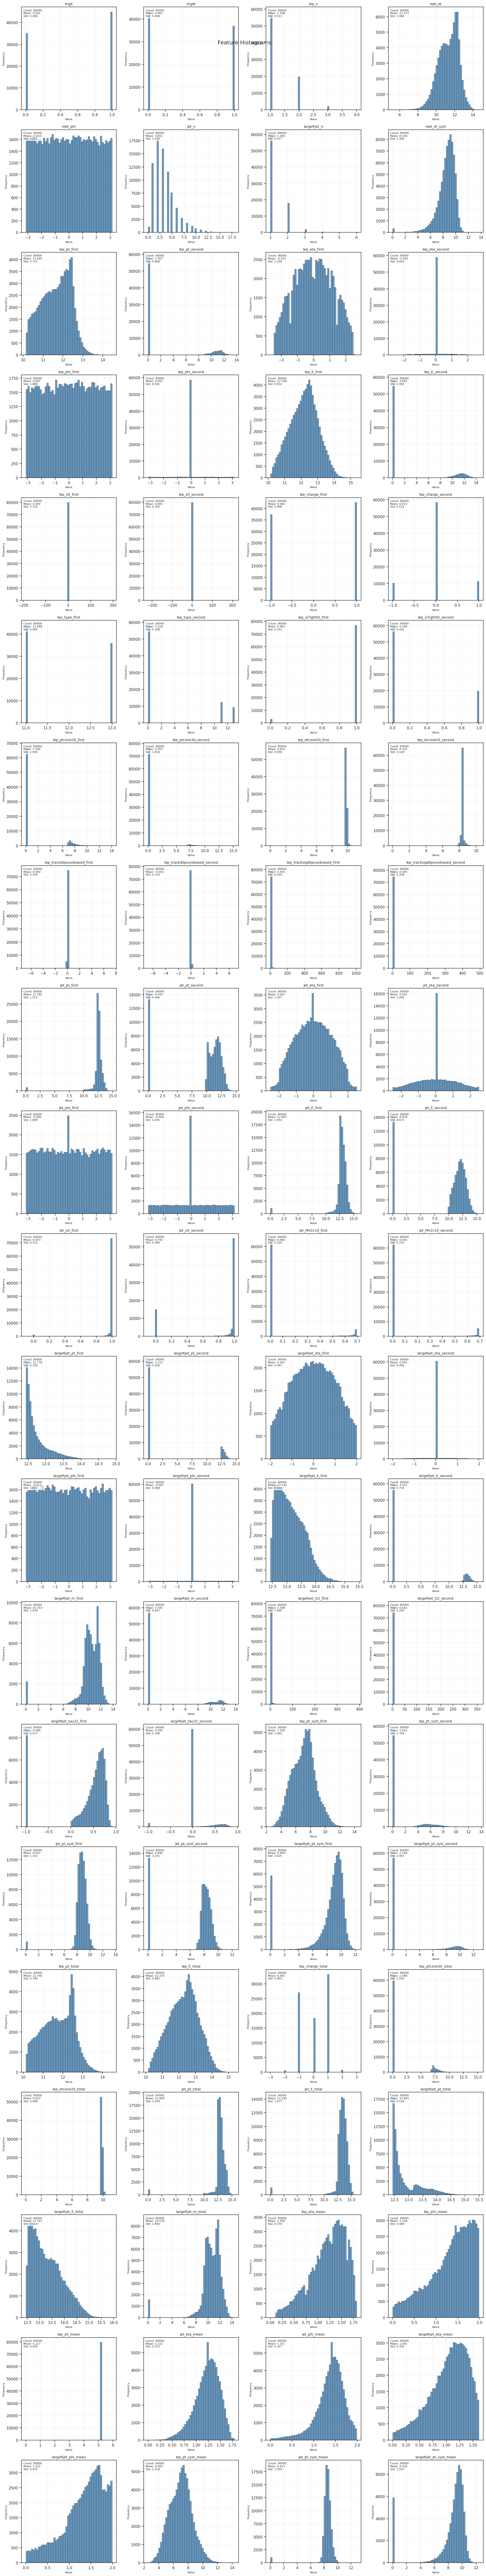

Created histograms for 84 features
Data shape: (80000, 84)


In [24]:
plot_dataframe_histograms(X)

#TODO: log transform the remaning freatures that might need it ex: largeRjet_D2 and other stuff

In [12]:
#TODO: figure out a way to limit the effect of outliers (the 0s)

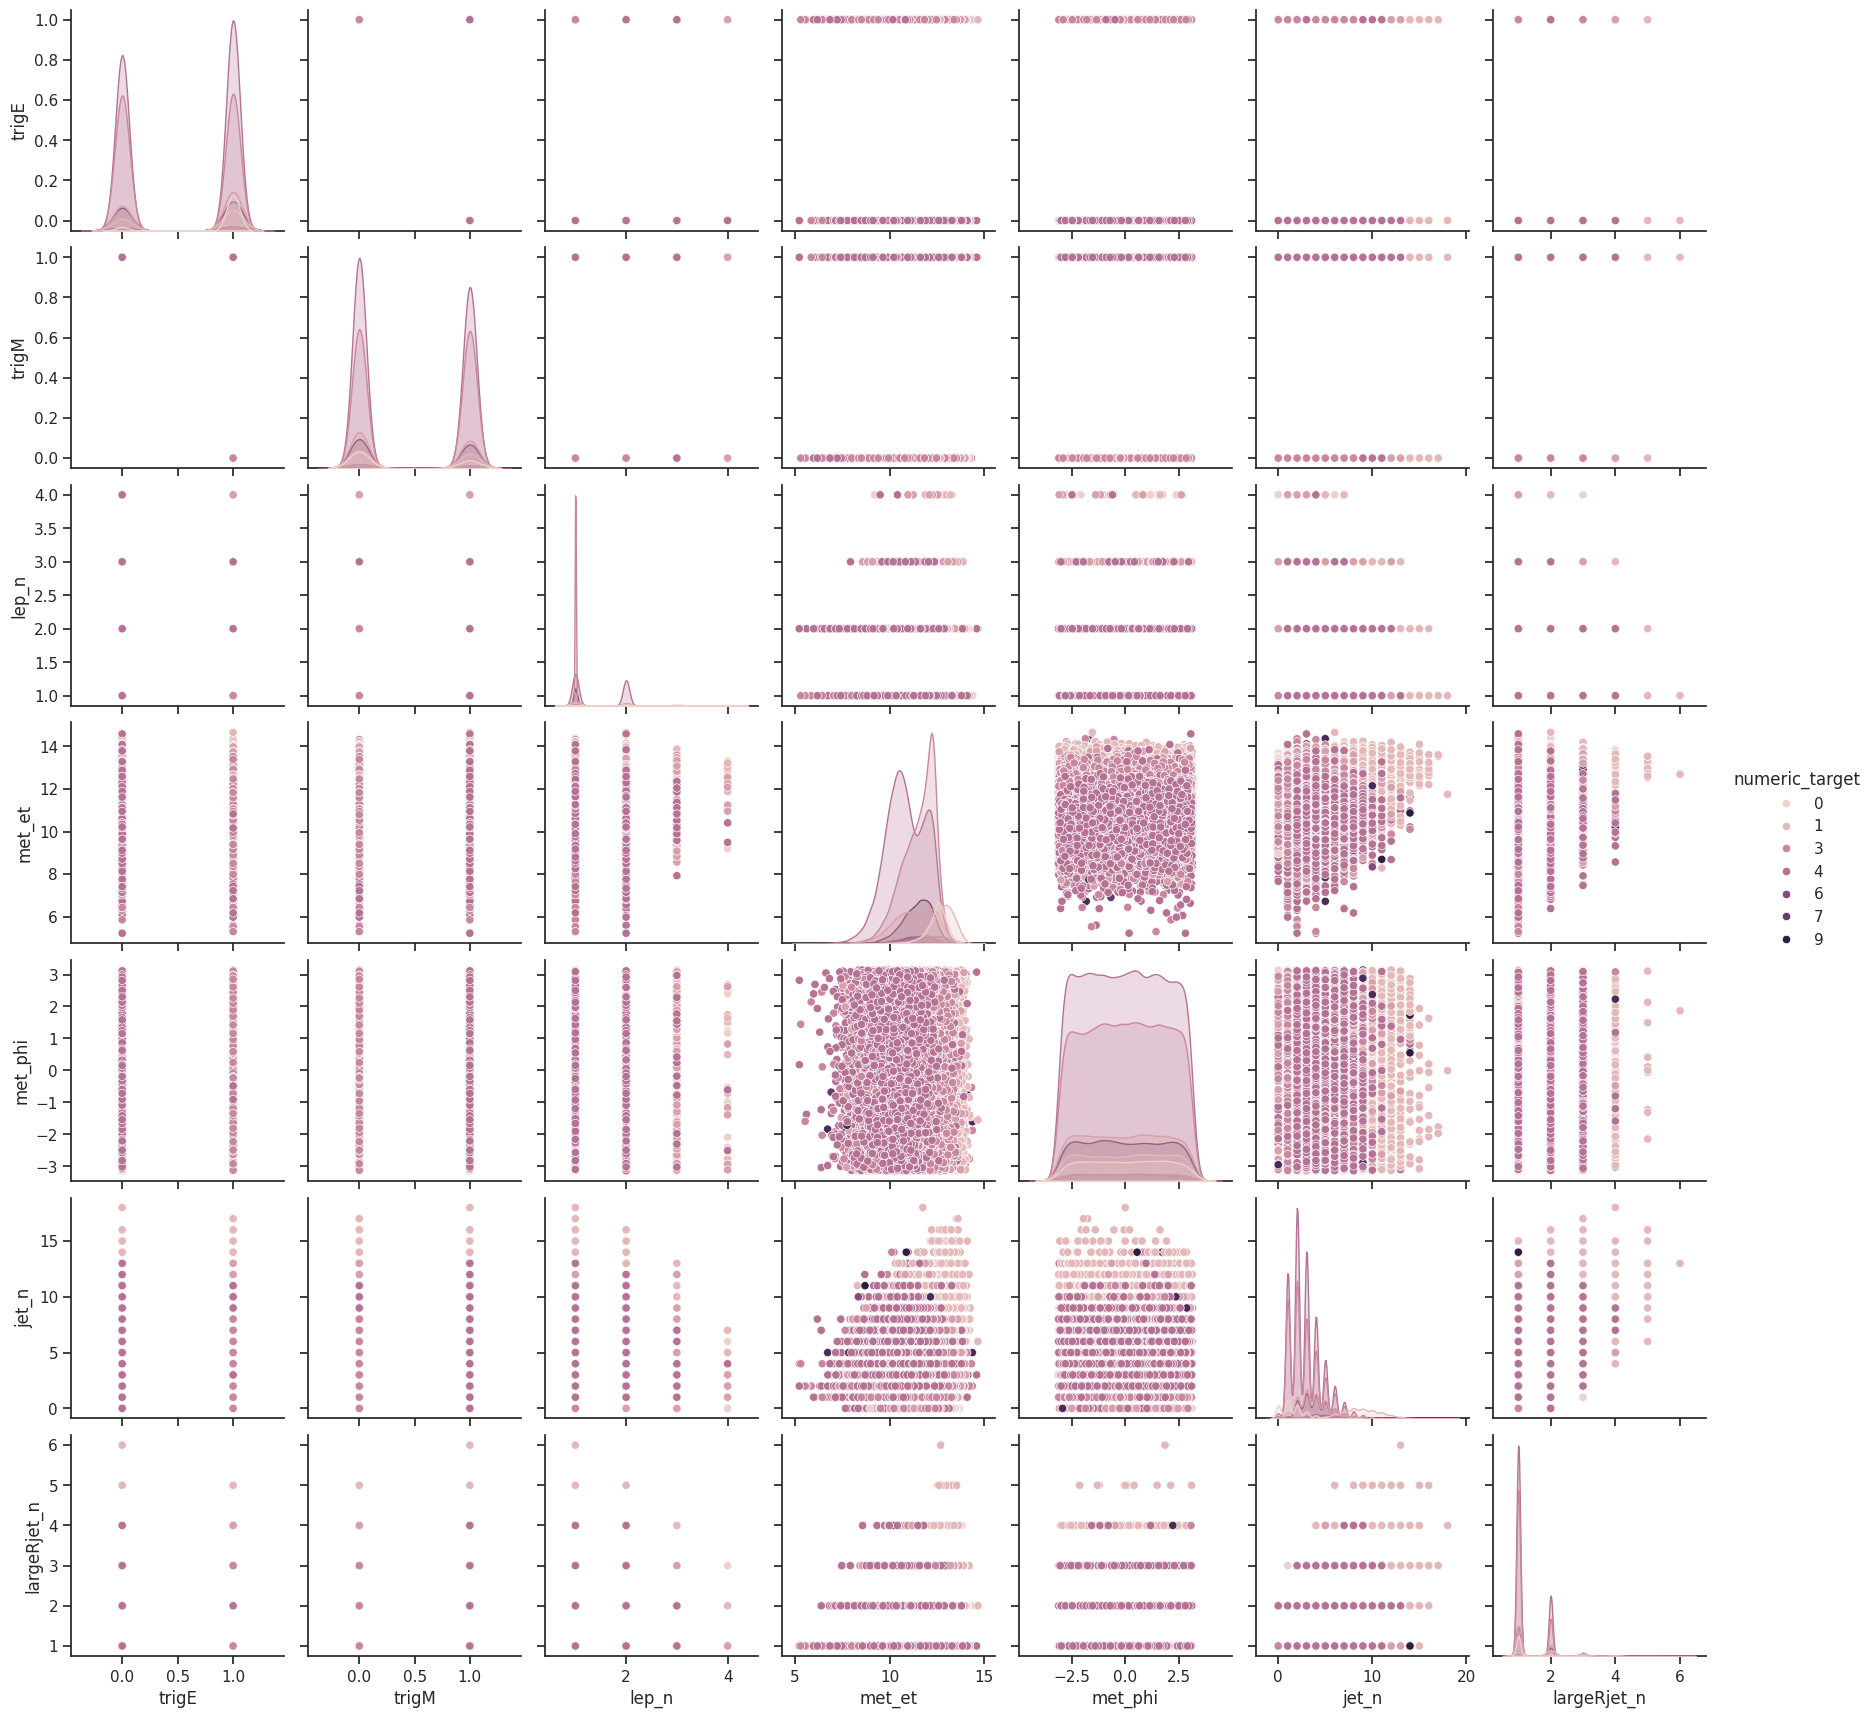

In [ ]:
# import seaborn as sns
# # Option 1: Create a combined DataFrame
# combined_df = X.iloc[:, :7].copy()
# combined_df['numeric_target'] = df['numeric_target'].values  # Use .values to avoid index mismatch

# sns.set_theme(style="ticks")
# sns.pairplot(combined_df,hue='numeric_target')
# plt.show()

In [25]:
# combined_df = df_extracted.iloc[:, :7].copy()
# combined_df['numeric_target'] = df['numeric_target'].values  # Use .values to avoid index mismatch

# sns.set_theme(style="ticks")
# sns.pairplot(combined_df,hue='numeric_target')
# plt.show()

In [26]:
print(np.sum(df_extracted.isna().sum() != 0))
print(np.sum(X.isna().sum() != 0))

0
0


In [32]:
y = df['numeric_target'].values
y

array([3, 3, 3, ..., 4, 4, 4], shape=(80000,))

## *Training begins here*

(array([63200.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   800.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

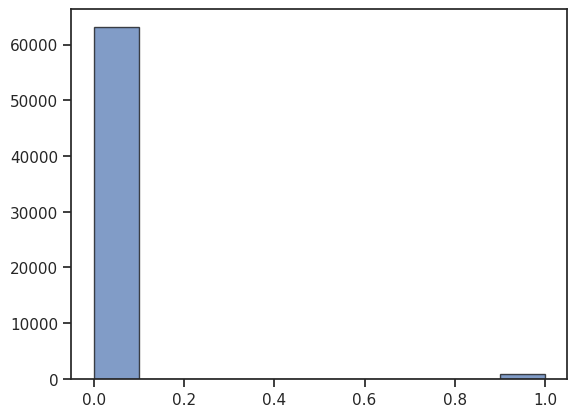

In [ ]:
# plan: train seaprtae models for each event type, then combine them into a single model

# train run, ttbar events

maskttbar = (y == 9)
yttbar = [1 if maskttbar[i] else 0 for i in range(len(y))]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, yttbar, test_size=0.2, random_state=123, stratify=yttbar)


plt.hist(y_train, edgecolor='black', alpha=0.7, )

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC
from tensorflow.keras.utils import to_categorical


# Convert DataFrame to NumPy arrays - THIS IS THE FIX!
X_train_array = X_train.values  # Convert DataFrame to NumPy array
X_test_array = X_test.values    # Convert DataFrame to NumPy array
y_train_array = np.array(y_train)  # Convert list to NumPy array
y_test_array = np.array(y_test)    # Convert list to NumPy array

print(f"X_train type: {type(X_train_array)}")
print(f"y_train type: {type(y_train_array)}")
print(f"X_train shape: {X_train_array.shape}")
print(f"y_train shape: {y_train_array.shape}")


#scaling the data

# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# # test different scaling methods
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train_array)
# X_test_scaled = scaler.transform(X_test_array)


#NOTE: standard scaling made the model worse 

#SCALING FUCKS EVERYTHING UP, DONT USE IT
# NOTE: AUC score always better without scaling!!!!!!!!!!!!!!!!

# Calculate class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train_array), 
    y=y_train_array
)


# Weighting classes to handle imbalance
mild_class_weights = {
    0: 1.0,  # Normal weight for majority class
    1: 10.0  # Adjust later. Maybe useless bc we use SMOTE already
}

print(f"Class distribution: {np.bincount(y_train_array)}")
print(f"Class weights: {mild_class_weights}")


# using smote to balance the dataset
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=123, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_array, y_train_array)

print(f"Original distribution: {np.bincount(y_train_array)}")
print(f"Balanced distribution: {np.bincount(y_train_balanced)}")




# NOTE: things to try: batch normalization, a smaller model, regularization. 
# NOTE: Batch normalization is very effective and shows very good imporovment
# NOTE: Regularization reduced misclassifying not ttbar events slightly, also a slight improvement to the ROC curve was seen. TODO: test different regularizers and their parameters
# NOTE: Fuck around with dropout
# NOTE: Model is very volatile. ()
# NOTE: Emplement callbacks to save the best model
# NOTE: a more compact archetecture made the model catch ttbar better, but a lot of background is also classified as ttbar
# NOTE: standard scalar just fucked it all up XD, it made the model classify all ttbar as not ttbar
# NOTE: SMOTE improved ttbar classification but fucked up not ttbar 
# TODO: test different class weights; 1:2 gives a good AUC curve but half of ttbar events are lost

# NOTE: used AUC as the evaluation metric. Also early stopping and best weights are not tied to AUC
# NOTE: using AUC is amazing!!

model = Sequential([
    Input(shape=(X_train_balanced.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(1, activation='sigmoid')  # ← Single output with sigmoid!
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',  # Now this matches!
    metrics=['accuracy', AUC(name='auc')]
)

# Your existing data preparation is correct
y_train_binary_single = y_train_balanced.astype(float)
y_test_binary_single = y_test_array.astype(float)

callbacks = [
    EarlyStopping(
        monitor='val_auc',
        patience=15,
        restore_best_weights=True,
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_auc',
        factor=0.5,
        patience=8,
        mode='max',
        min_lr=1e-6,
        verbose=1
    )
]

# Train the model
history = model.fit(
    X_train_balanced, y_train_binary_single,
    validation_data=(X_test_array, y_test_binary_single),
    epochs=50,
    callbacks=callbacks,
    batch_size=32,
    verbose=1
)

X_train type: <class 'numpy.ndarray'>
y_train type: <class 'numpy.ndarray'>
X_train shape: (64000, 84)
y_train shape: (64000,)
Class distribution: [63200   800]
Class weights: {0: 1.0, 1: 10.0}
Original distribution: [63200   800]
Balanced distribution: [63200 63200]
Epoch 1/50
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7410 - auc: 0.8061 - loss: 0.6218 - val_accuracy: 0.7450 - val_auc: 0.8788 - val_loss: 0.5192 - learning_rate: 0.0010
Epoch 2/50
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8262 - auc: 0.8932 - loss: 0.4382 - val_accuracy: 0.6984 - val_auc: 0.8819 - val_loss: 0.6279 - learning_rate: 0.0010
Epoch 3/50
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8313 - auc: 0.8985 - loss: 0.4157 - val_accuracy: 0.9369 - val_auc: 0.8774 - val_loss: 0.1665 - learning_rate: 0.0010
Epoch 4/50
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8342 - auc: 0.9009 - loss: 0.4092 - val_accuracy: 0.9319 - val_auc: 0.8909 - val_loss: 0.2003 - learni

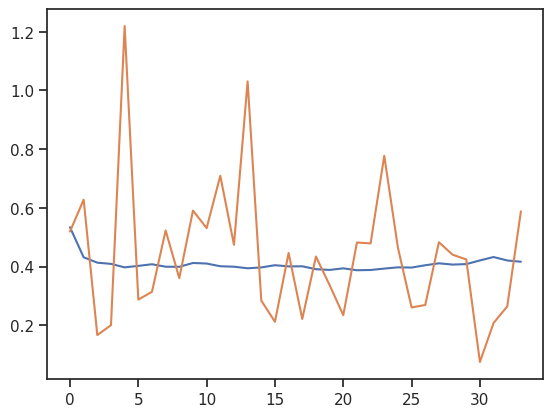

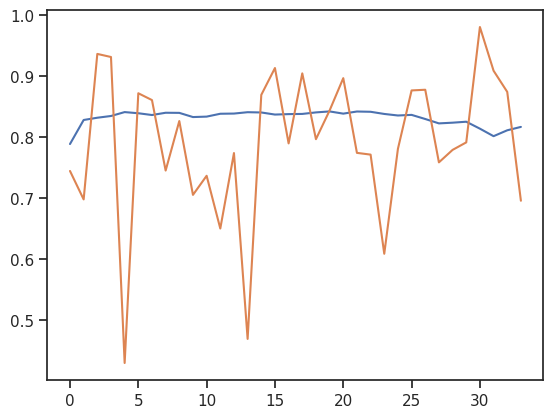

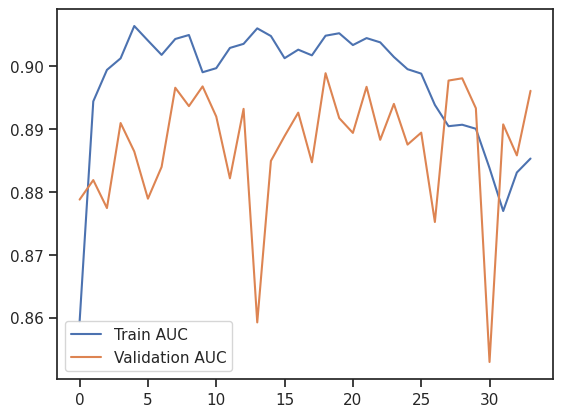

In [104]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.show()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.legend()
plt.show()

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


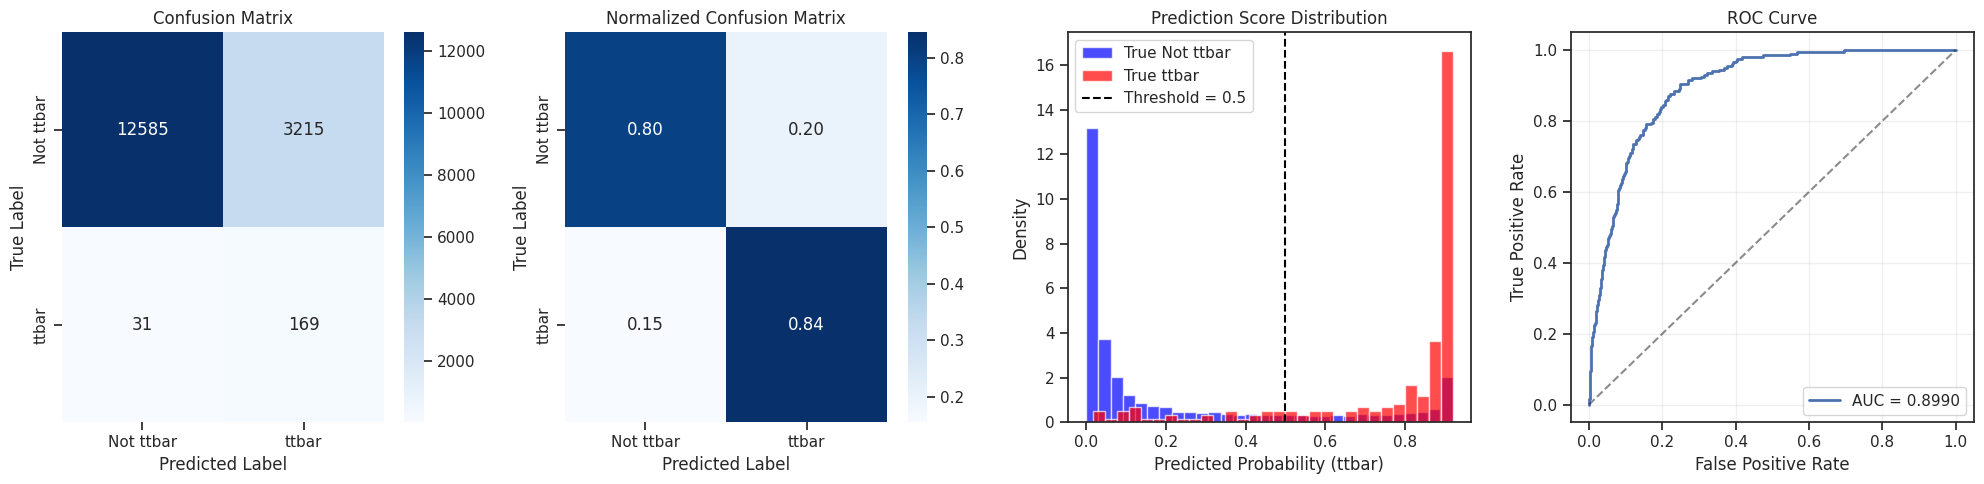

=== MODEL EVALUATION REPORT ===
Total samples: 16000
Classes: ['Not ttbar', 'ttbar']
Class distribution: [15800   200]
Classification threshold: 0.5

Classification Report:
              precision    recall  f1-score   support

   Not ttbar       1.00      0.80      0.89     15800
       ttbar       0.05      0.84      0.09       200

    accuracy                           0.80     16000
   macro avg       0.52      0.82      0.49     16000
weighted avg       0.99      0.80      0.88     16000


Detailed Metrics:
True Negatives (correctly predicted Not ttbar): 12585
False Positives (incorrectly predicted ttbar): 3215
False Negatives (missed ttbar events): 31
True Positives (correctly predicted ttbar): 169
Precision: 0.0499
Recall: 0.8450
Specificity: 0.7965
F1-Score: 0.0943
AUC Score: 0.8990

Physics Metrics:
ttbar detection efficiency: 0.8450 (169/200)
Background rejection rate: 0.7965 (12585/15800)
Final AUC Score: 0.8990


In [106]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

def comprehensive_model_evaluation_binary(model, X_test, y_test, threshold=0.5, class_names=None):
    """
    Complete evaluation for binary classification with sigmoid output
    """
    # Predictions - sigmoid returns single values, not array
    y_pred_proba = model.predict(X_test).ravel()  # ← Flatten to 1D array
    y_pred = (y_pred_proba > threshold).astype(int)  # ← Convert probabilities to binary predictions
    
    if class_names is None:
        class_names = ['Not ttbar', 'ttbar']
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create comprehensive plot
    fig = plt.figure(figsize=(20, 5))
    
    # 1. Confusion Matrix
    plt.subplot(1, 4, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # 2. Normalized Confusion Matrix
    plt.subplot(1, 4, 2)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Normalized Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # 3. Prediction Confidence Distribution
    plt.subplot(1, 4, 3)
    # Plot distribution for each true class
    plt.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, 
             label='True Not ttbar', density=True, color='blue')
    plt.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, 
             label='True ttbar', density=True, color='red')
    plt.axvline(x=threshold, color='black', linestyle='--', 
                label=f'Threshold = {threshold}')
    plt.xlabel('Predicted Probability (ttbar)')
    plt.ylabel('Density')
    plt.title('Prediction Score Distribution')
    plt.legend()
    
    # 4. ROC Curve
    plt.subplot(1, 4, 4)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # ← Use raw probabilities for ROC
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed report
    print("=== MODEL EVALUATION REPORT ===")
    print(f"Total samples: {len(y_test)}")
    print(f"Classes: {class_names}")
    print(f"Class distribution: {np.bincount(y_test)}")
    print(f"Classification threshold: {threshold}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    # Detailed confusion matrix breakdown
    tn, fp, fn, tp = cm.ravel()
    print(f"\nDetailed Metrics:")
    print(f"True Negatives (correctly predicted Not ttbar): {tn}")
    print(f"False Positives (incorrectly predicted ttbar): {fp}")
    print(f"False Negatives (missed ttbar events): {fn}")
    print(f"True Positives (correctly predicted ttbar): {tp}")
    print(f"Precision: {tp/(tp+fp) if (tp+fp) > 0 else 0:.4f}")
    print(f"Recall: {tp/(tp+fn) if (tp+fn) > 0 else 0:.4f}")
    print(f"Specificity: {tn/(tn+fp) if (tn+fp) > 0 else 0:.4f}")
    print(f"F1-Score: {2*tp/(2*tp+fp+fn) if (2*tp+fp+fn) > 0 else 0:.4f}")
    print(f"AUC Score: {roc_auc:.4f}")
    
    # Physics-specific metrics
    total_ttbar = tp + fn
    total_background = tn + fp
    ttbar_efficiency = tp / total_ttbar if total_ttbar > 0 else 0
    background_rejection = tn / total_background if total_background > 0 else 0
    
    print(f"\nPhysics Metrics:")
    print(f"ttbar detection efficiency: {ttbar_efficiency:.4f} ({tp}/{total_ttbar})")
    print(f"Background rejection rate: {background_rejection:.4f} ({tn}/{total_background})")
    
    return cm, y_pred, y_pred_proba, roc_auc

# Use the corrected evaluation function
cm, predictions, probabilities, auc_score = comprehensive_model_evaluation_binary(
    model, X_test_array, y_test_array, 
    threshold=0.5,  # You can adjust this threshold
    class_names=['Not ttbar', 'ttbar']
)

print(f"Final AUC Score: {auc_score:.4f}")

### THE MONOLITH

Target Distribution:
  C1N2 (target=0): 3000 samples
  GG (target=1): 4000 samples
  VV (target=2): 7000 samples
  W (target=3): 24000 samples
  Z (target=4): 32000 samples
  ZPrime (target=5): 1000 samples
  Zprime2000 (target=6): 1000 samples
  Zprime750 (target=7): 1000 samples
  singletop (target=8): 6000 samples
  ttbar (target=9): 1000 samples

Training models for 10 targets with >= 50 samples
Valid targets: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]

TRAINING BINARY CLASSIFIER FOR: C1N2 (target=0)
Class distribution: {np.int64(0): np.int64(77000), np.int64(1): np.int64(3000)}
Training set shape: (64000, 84)
Test set shape: (16000, 84)
Training class distribution: [61600  2400]
Test class distribution: [15400   600]
Applying SMOTE...
After SMOTE: [61600 61600]
Training model...
Epoch 1/20
3850/3850 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8710 - auc: 0.9339 - loss: 0.3949 - val_accuracy

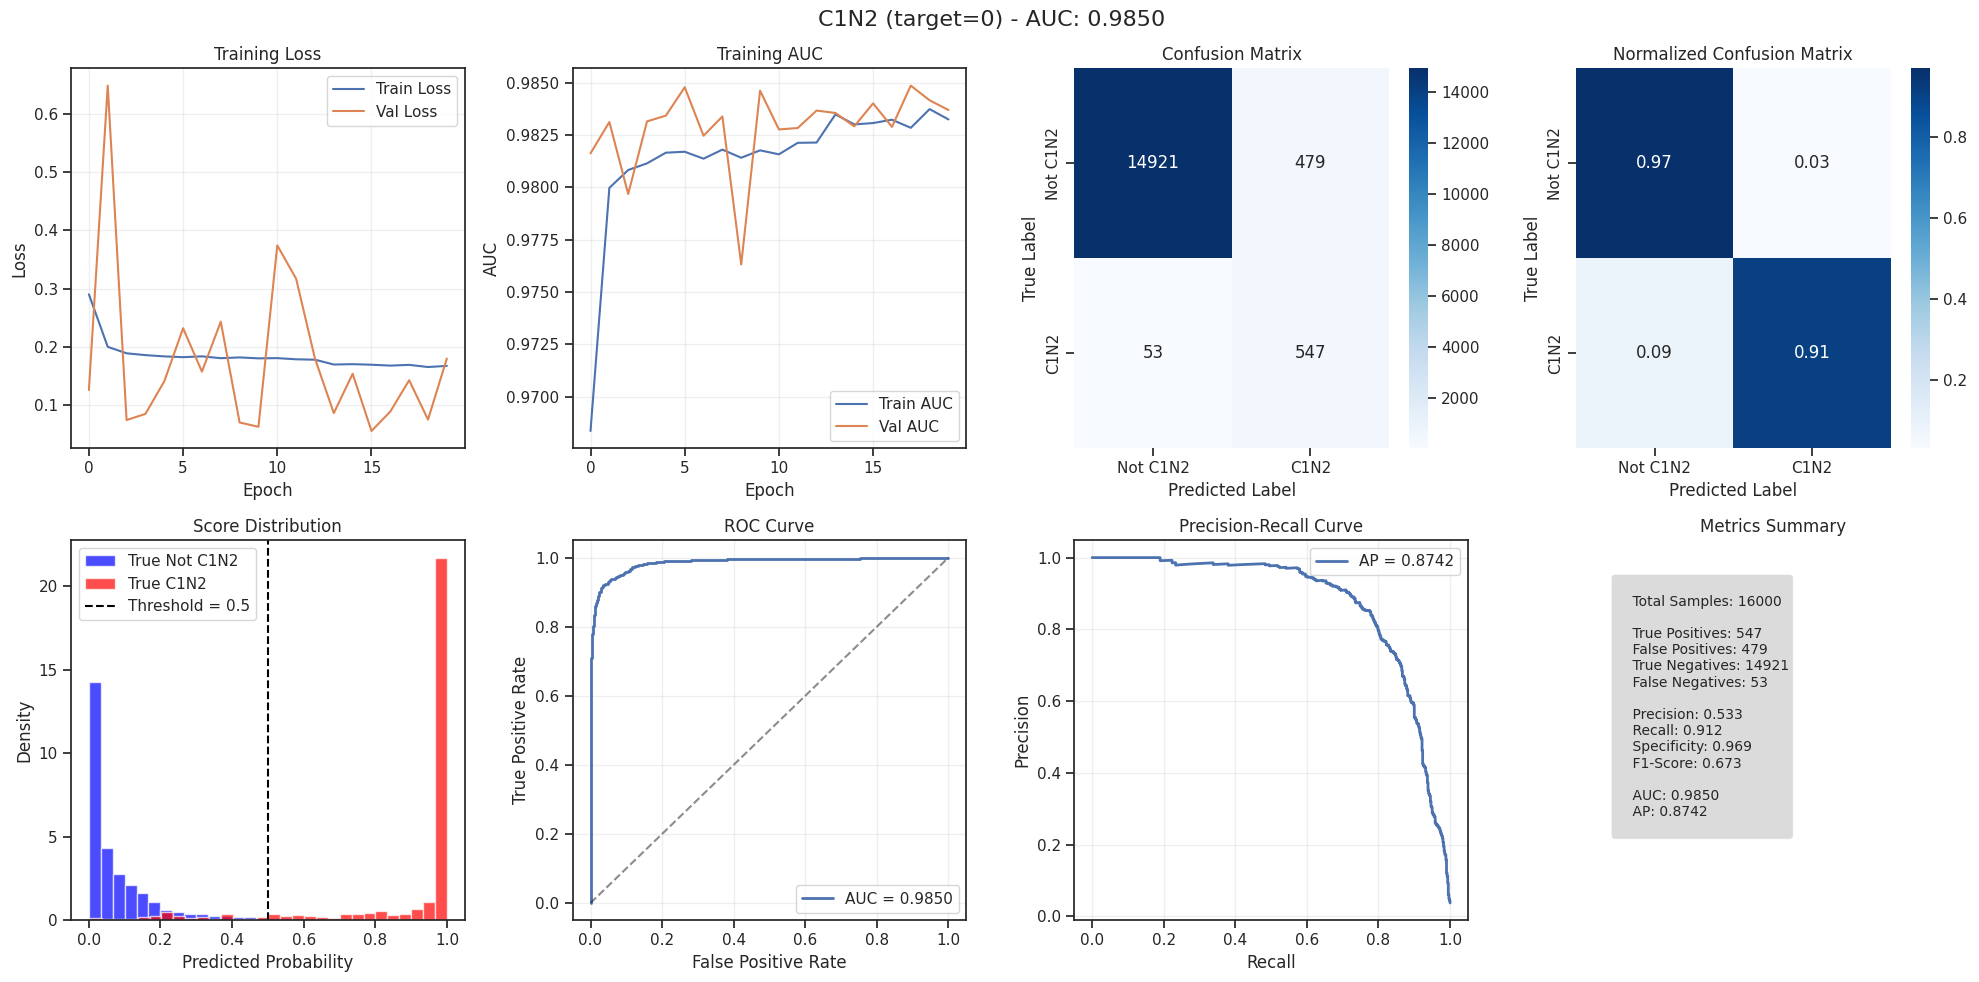


TRAINING BINARY CLASSIFIER FOR: GG (target=1)
Class distribution: {np.int64(0): np.int64(76000), np.int64(1): np.int64(4000)}
Training set shape: (64000, 84)
Test set shape: (16000, 84)
Training class distribution: [60800  3200]
Test class distribution: [15200   800]
Applying SMOTE...
After SMOTE: [60800 60800]
Training model...
Epoch 1/20
3800/3800 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9140 - auc: 0.9642 - loss: 0.3004 - val_accuracy: 0.9815 - val_auc: 0.9962 - val_loss: 0.0889 - learning_rate: 0.0010
Epoch 2/20
3800/3800 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9677 - auc: 0.9931 - loss: 0.1235 - val_accuracy: 0.8049 - val_auc: 0.9955 - val_loss: 0.5471 - learning_rate: 0.0010
Epoch 3/20
3800/3800 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9687 - auc: 0.9936 - loss: 0.1092 - val_accuracy: 0.9618 - val_auc: 0.9963 - val_loss: 0.1267 - learning_rate: 0.0010
Epoch 4/20
3800/3800 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9699 - auc: 0.9936 - loss: 0.1053 - va

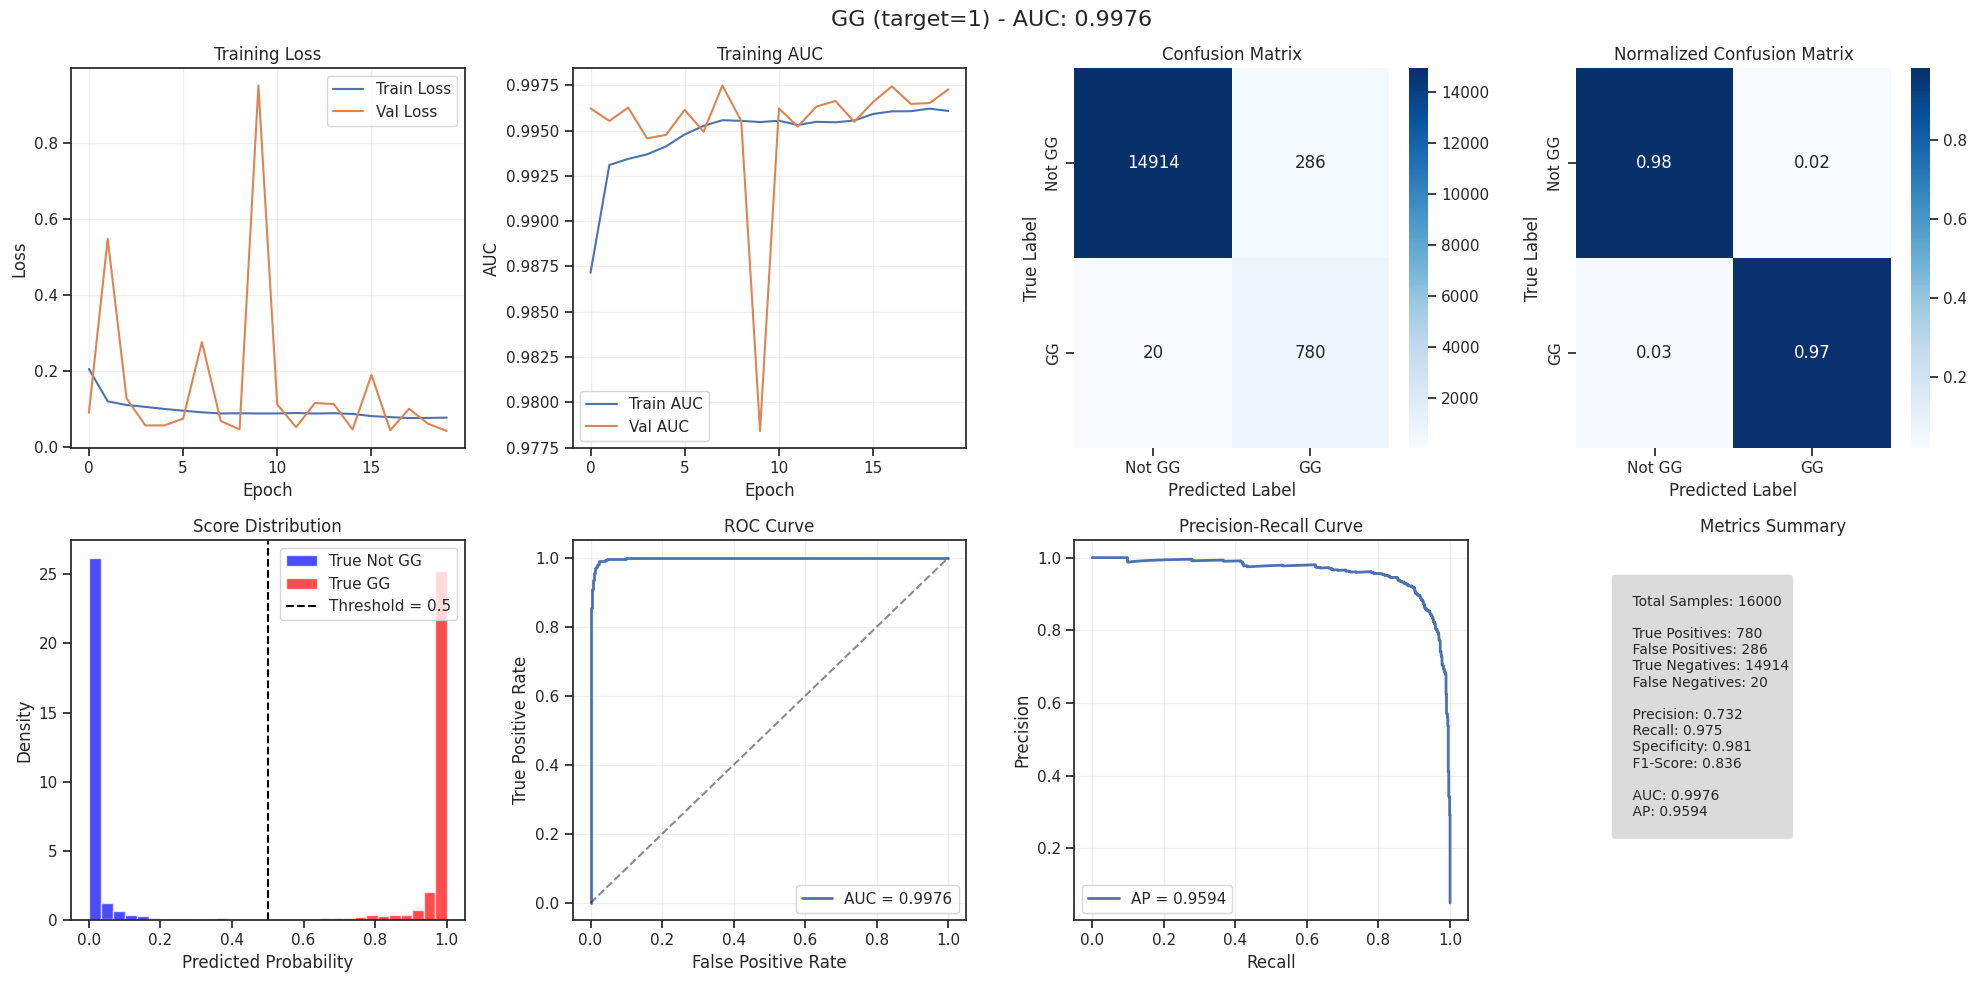


TRAINING BINARY CLASSIFIER FOR: VV (target=2)
Class distribution: {np.int64(0): np.int64(73000), np.int64(1): np.int64(7000)}
Training set shape: (64000, 84)
Test set shape: (16000, 84)
Training class distribution: [58400  5600]
Test class distribution: [14600  1400]
Applying SMOTE...
After SMOTE: [58400 58400]
Training model...
Epoch 1/20
3650/3650 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.5856 - auc: 0.6172 - loss: 0.7639 - val_accuracy: 0.6369 - val_auc: 0.7083 - val_loss: 0.6600 - learning_rate: 0.0010
Epoch 2/20
3650/3650 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.6607 - auc: 0.7133 - loss: 0.6498 - val_accuracy: 0.7863 - val_auc: 0.6702 - val_loss: 0.4696 - learning_rate: 0.0010
Epoch 3/20
3650/3650 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.6726 - auc: 0.7283 - loss: 0.6278 - val_accuracy: 0.5186 - val_auc: 0.7348 - val_loss: 0.7231 - learning_rate: 0.0010
Epoch 4/20
3650/3650 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.6756 - auc: 0.7316 - loss: 0.6246 - va

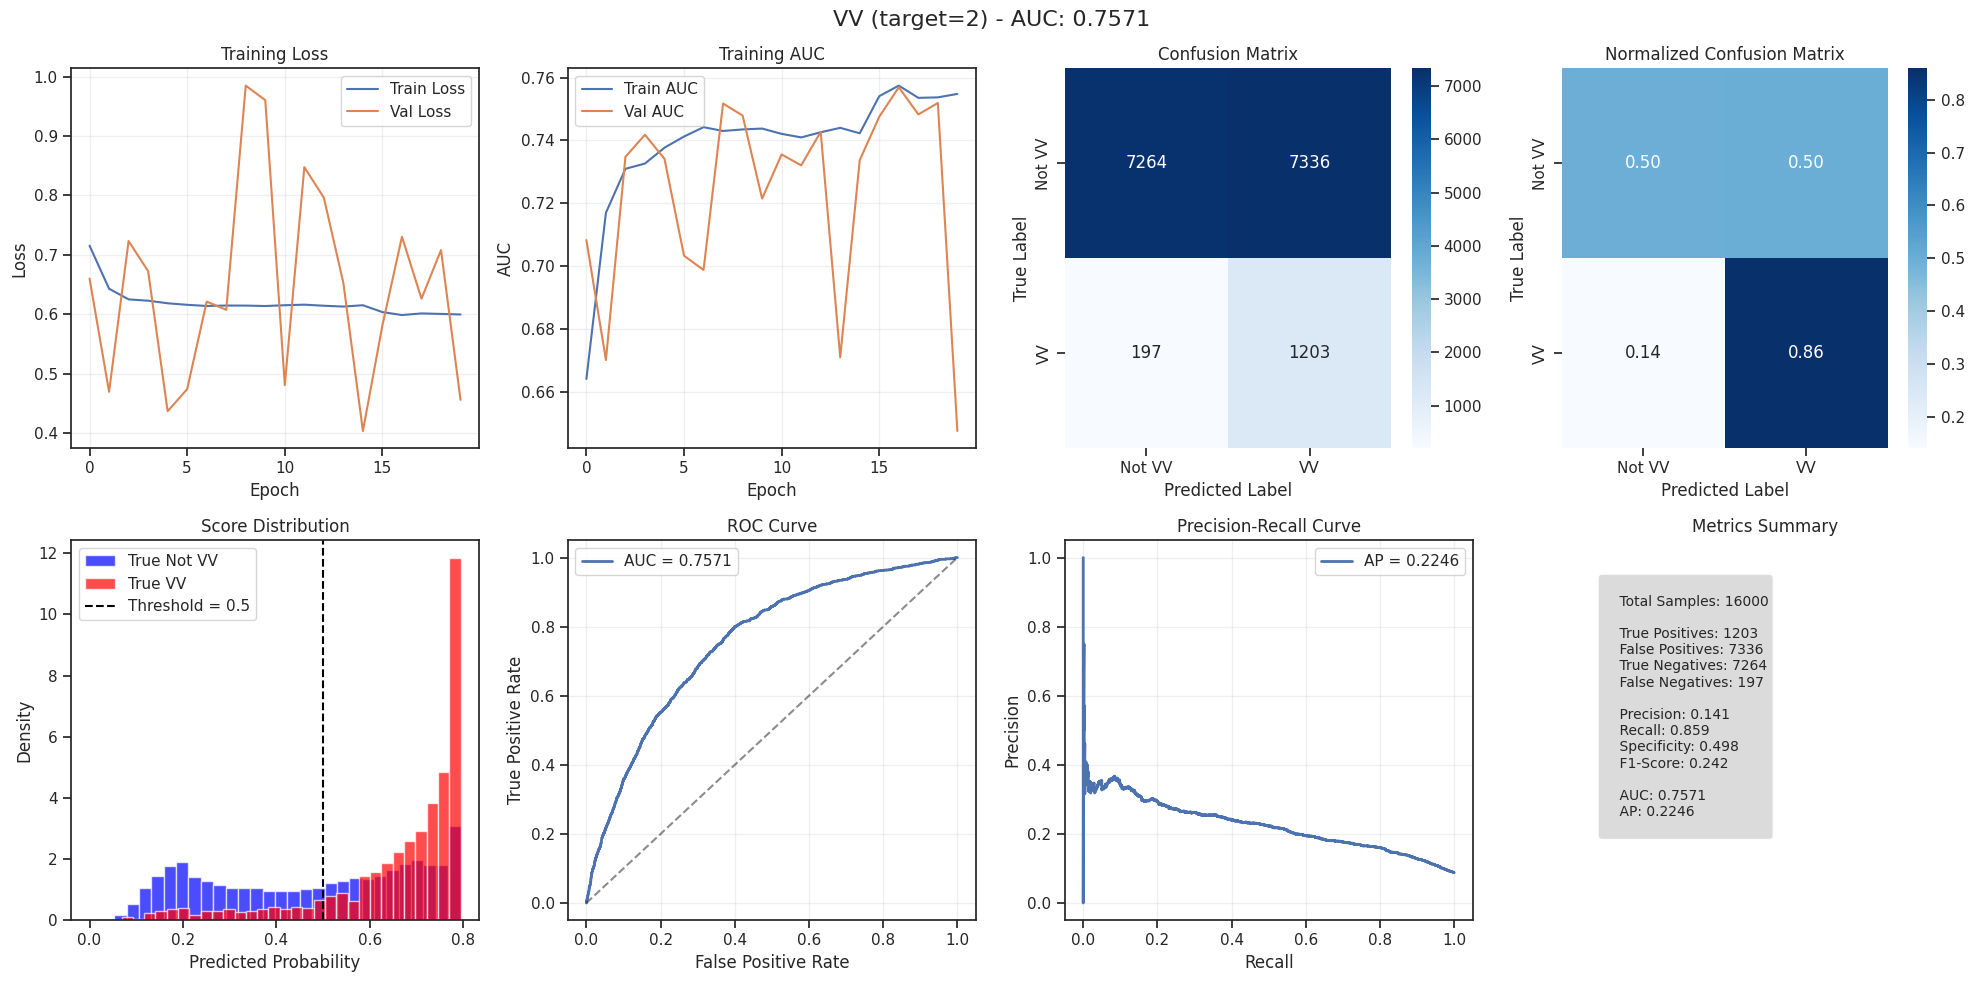


TRAINING BINARY CLASSIFIER FOR: W (target=3)
Class distribution: {np.int64(0): np.int64(56000), np.int64(1): np.int64(24000)}
Training set shape: (64000, 84)
Test set shape: (16000, 84)
Training class distribution: [44800 19200]
Test class distribution: [11200  4800]
Applying SMOTE...
After SMOTE: [44800 44800]
Training model...
Epoch 1/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.6630 - auc: 0.7243 - loss: 0.6943 - val_accuracy: 0.5947 - val_auc: 0.7999 - val_loss: 0.6448 - learning_rate: 0.0010
Epoch 2/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7282 - auc: 0.7886 - loss: 0.5571 - val_accuracy: 0.7399 - val_auc: 0.8103 - val_loss: 0.4879 - learning_rate: 0.0010
Epoch 3/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7341 - auc: 0.7971 - loss: 0.5312 - val_accuracy: 0.5782 - val_auc: 0.7907 - val_loss: 0.6299 - learning_rate: 0.0010
Epoch 4/20
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7361 - auc: 0.7942 - loss: 0.5271 - va

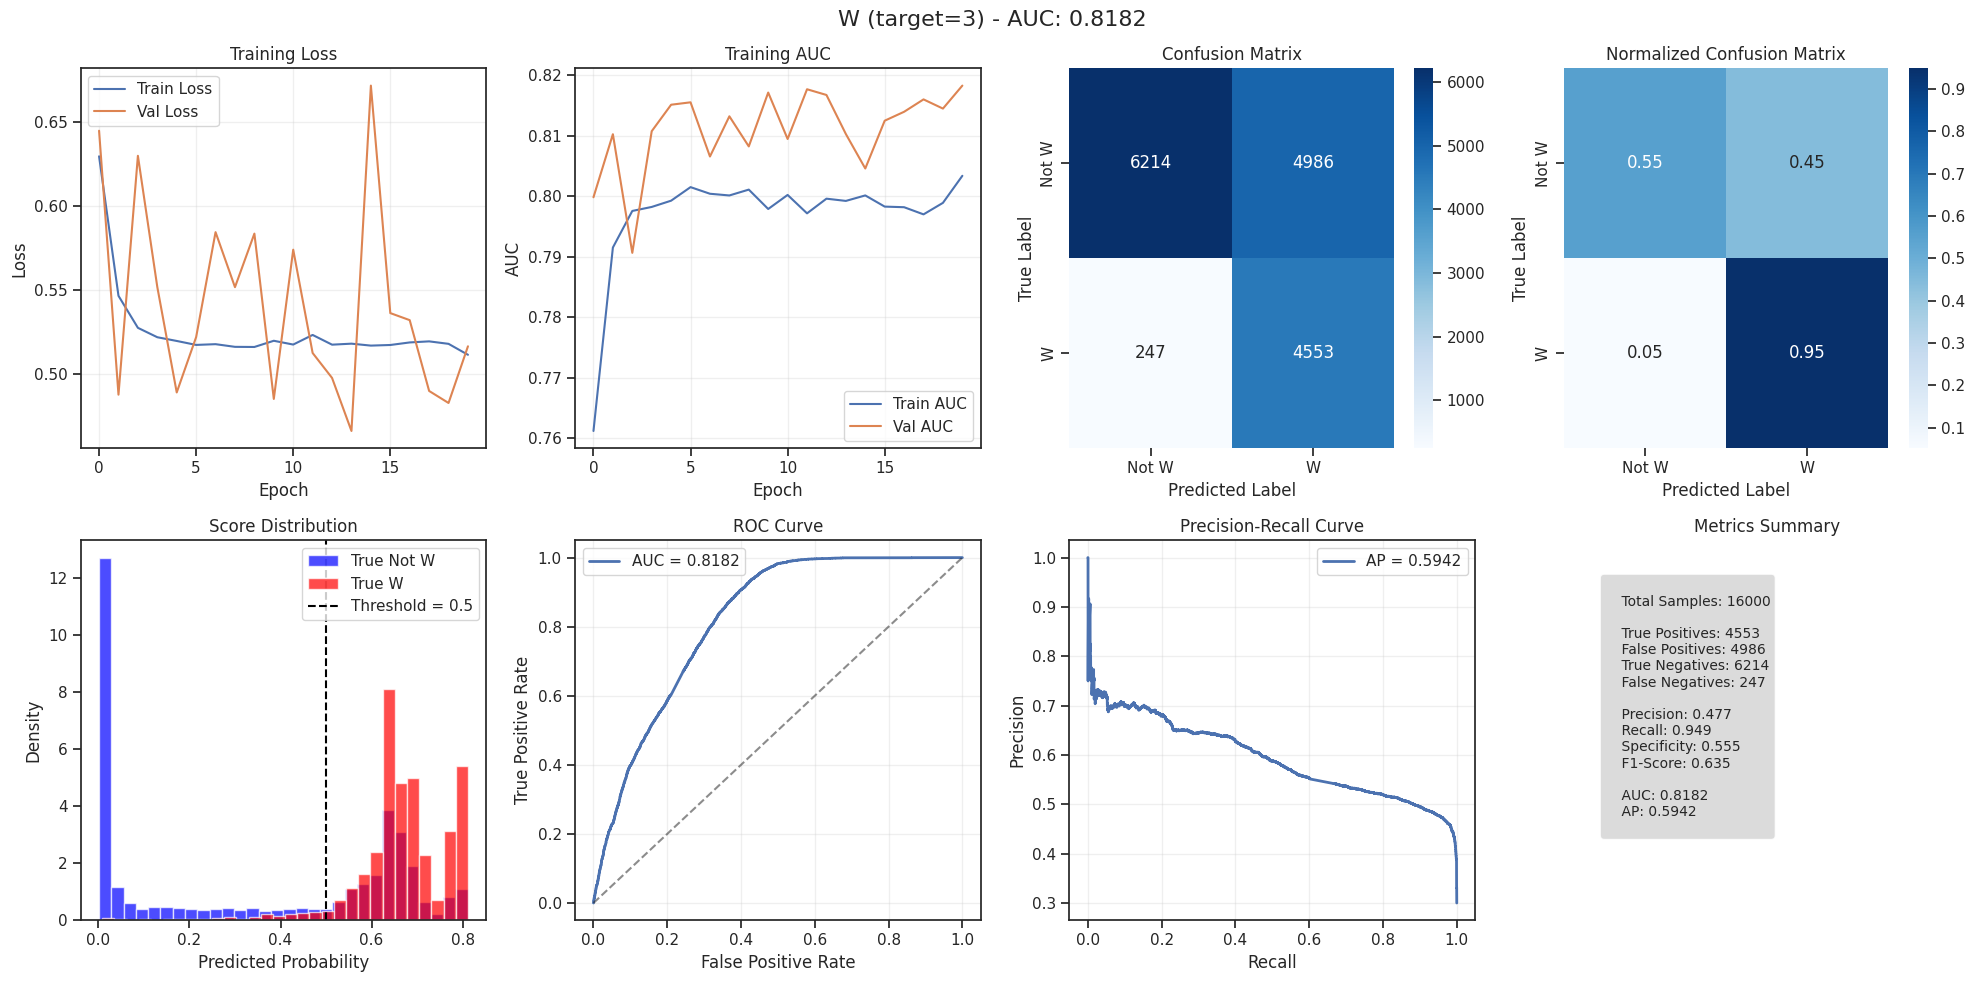


TRAINING BINARY CLASSIFIER FOR: Z (target=4)
Class distribution: {np.int64(0): np.int64(48000), np.int64(1): np.int64(32000)}
Training set shape: (64000, 84)
Test set shape: (16000, 84)
Training class distribution: [38400 25600]
Test class distribution: [9600 6400]
Applying SMOTE...
After SMOTE: [38400 38400]
Training model...
Epoch 1/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.6128 - auc: 0.6540 - loss: 0.7749 - val_accuracy: 0.7036 - val_auc: 0.7730 - val_loss: 0.6264 - learning_rate: 0.0010
Epoch 2/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6895 - auc: 0.7683 - loss: 0.6166 - val_accuracy: 0.7396 - val_auc: 0.7928 - val_loss: 0.5496 - learning_rate: 0.0010
Epoch 3/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6957 - auc: 0.7772 - loss: 0.5825 - val_accuracy: 0.5536 - val_auc: 0.7622 - val_loss: 0.7007 - learning_rate: 0.0010
Epoch 4/20
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6957 - auc: 0.7791 - loss: 0.5719 - val_

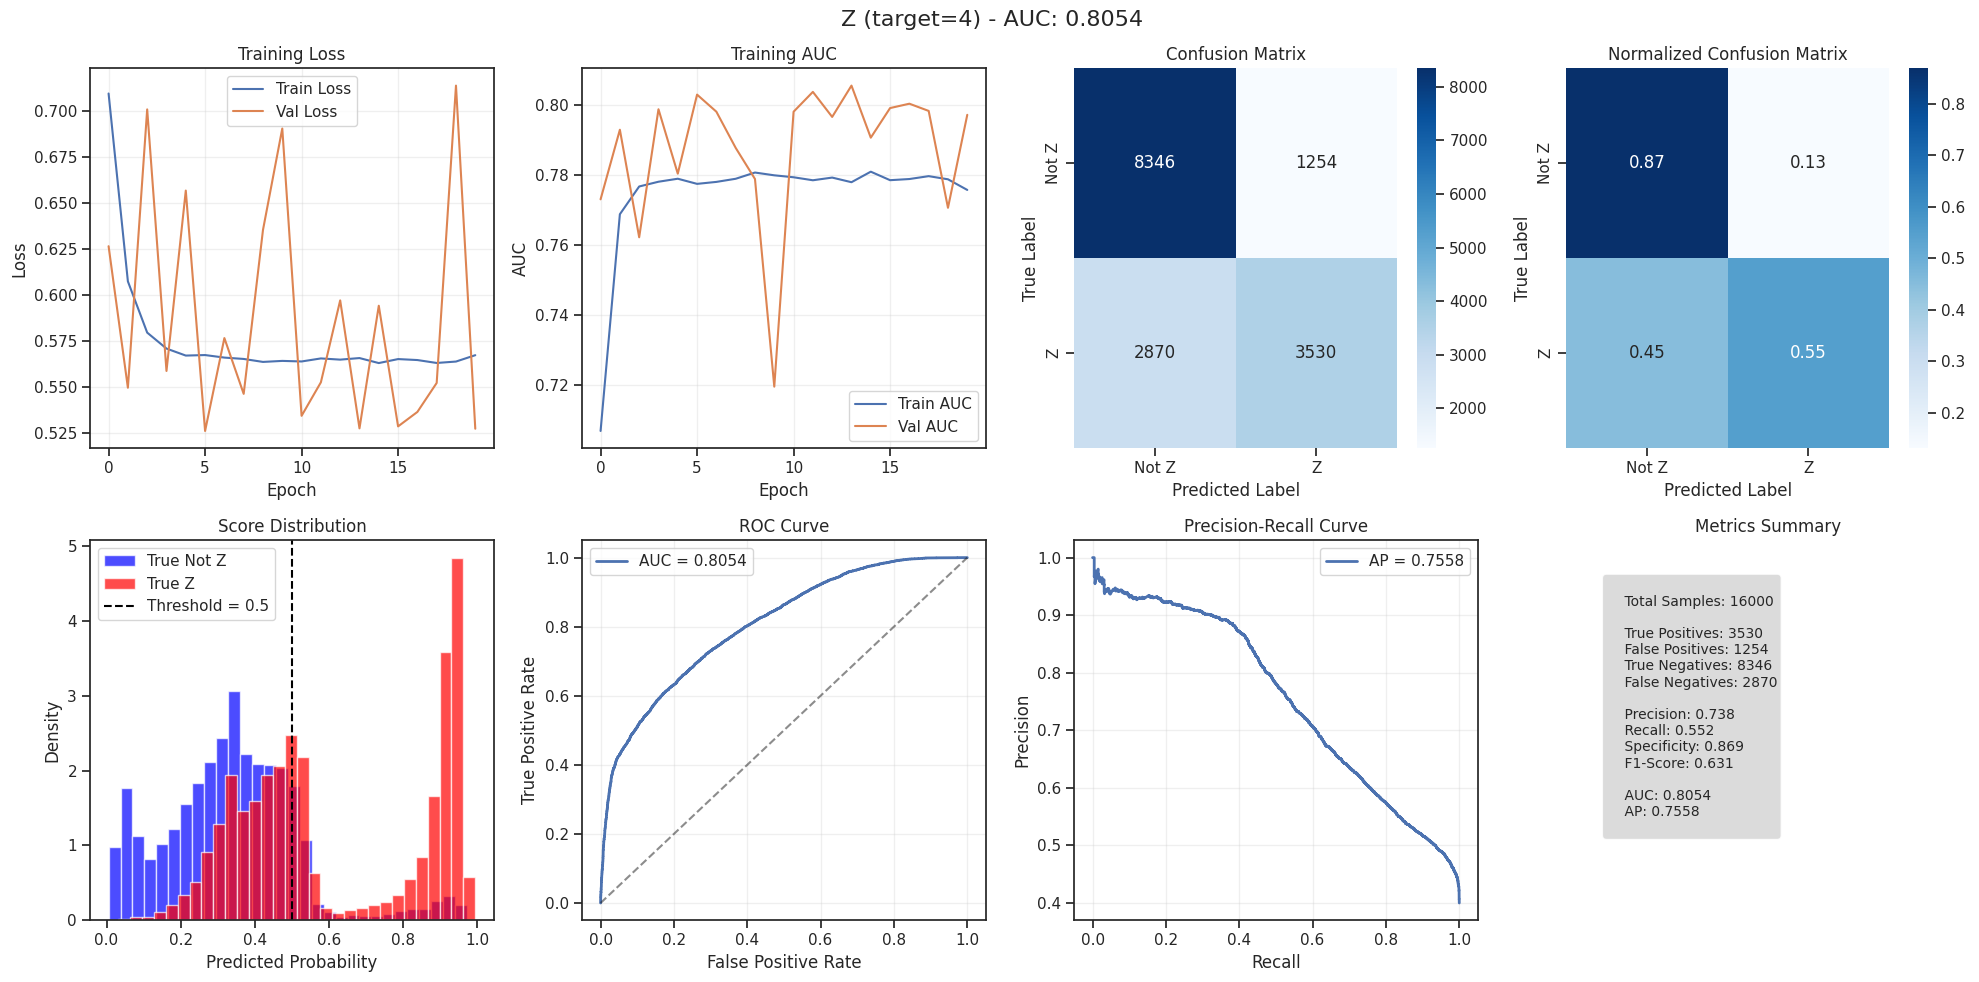


TRAINING BINARY CLASSIFIER FOR: ZPrime (target=5)
Class distribution: {np.int64(0): np.int64(79000), np.int64(1): np.int64(1000)}
Training set shape: (64000, 84)
Test set shape: (16000, 84)
Training class distribution: [63200   800]
Test class distribution: [15800   200]
Applying SMOTE...
After SMOTE: [63200 63200]
Training model...
Epoch 1/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.7647 - auc: 0.8329 - loss: 0.5871 - val_accuracy: 0.8708 - val_auc: 0.9038 - val_loss: 0.3649 - learning_rate: 0.0010
Epoch 2/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8621 - auc: 0.9236 - loss: 0.3879 - val_accuracy: 0.7141 - val_auc: 0.8922 - val_loss: 0.6596 - learning_rate: 0.0010
Epoch 3/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8674 - auc: 0.9312 - loss: 0.3584 - val_accuracy: 0.7424 - val_auc: 0.8370 - val_loss: 0.5982 - learning_rate: 0.0010
Epoch 4/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8687 - auc: 0.9301 - loss: 0.3564 

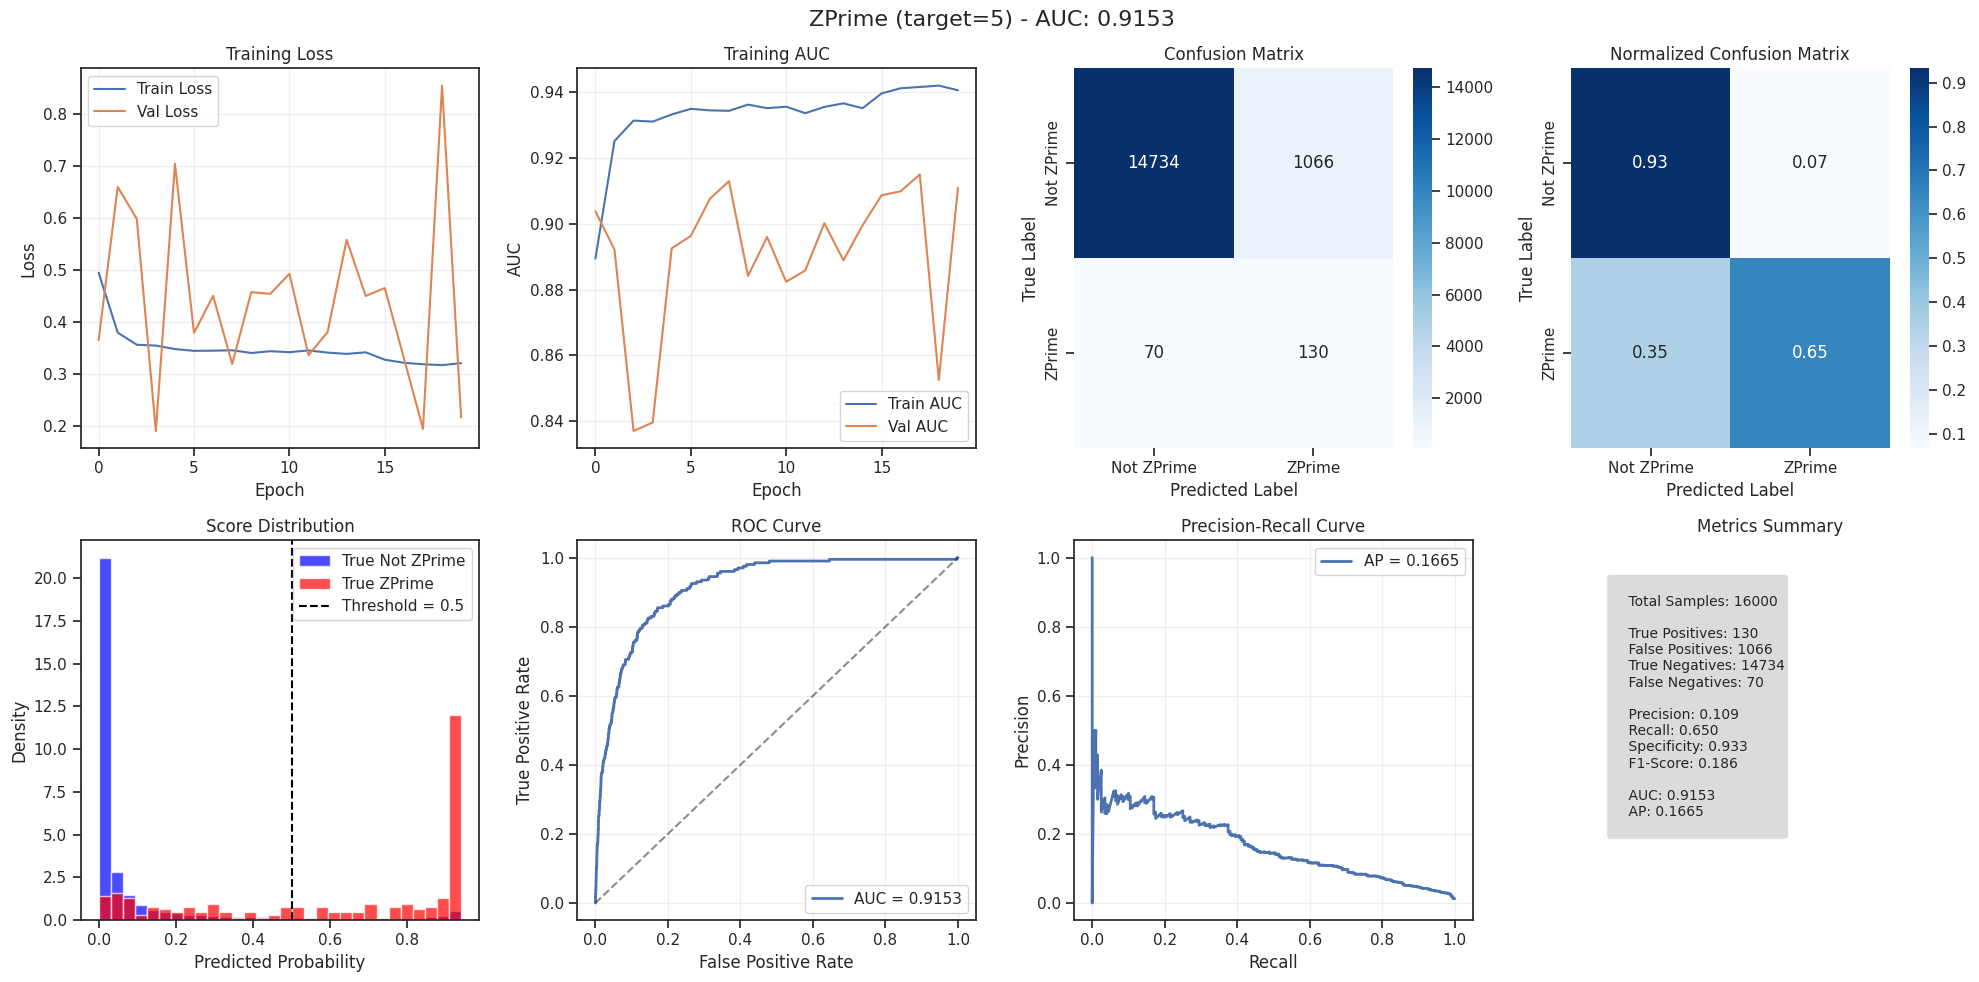


TRAINING BINARY CLASSIFIER FOR: Zprime2000 (target=6)
Class distribution: {np.int64(0): np.int64(79000), np.int64(1): np.int64(1000)}
Training set shape: (64000, 84)
Test set shape: (16000, 84)
Training class distribution: [63200   800]
Test class distribution: [15800   200]
Applying SMOTE...
After SMOTE: [63200 63200]
Training model...
Epoch 1/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.8205 - auc: 0.8950 - loss: 0.4938 - val_accuracy: 0.5836 - val_auc: 0.9317 - val_loss: 0.9445 - learning_rate: 0.0010
Epoch 2/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8863 - auc: 0.9521 - loss: 0.3153 - val_accuracy: 0.8979 - val_auc: 0.9418 - val_loss: 0.2554 - learning_rate: 0.0010
Epoch 3/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8923 - auc: 0.9562 - loss: 0.2903 - val_accuracy: 0.7379 - val_auc: 0.9422 - val_loss: 0.6004 - learning_rate: 0.0010
Epoch 4/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8935 - auc: 0.9573 - loss: 0.2

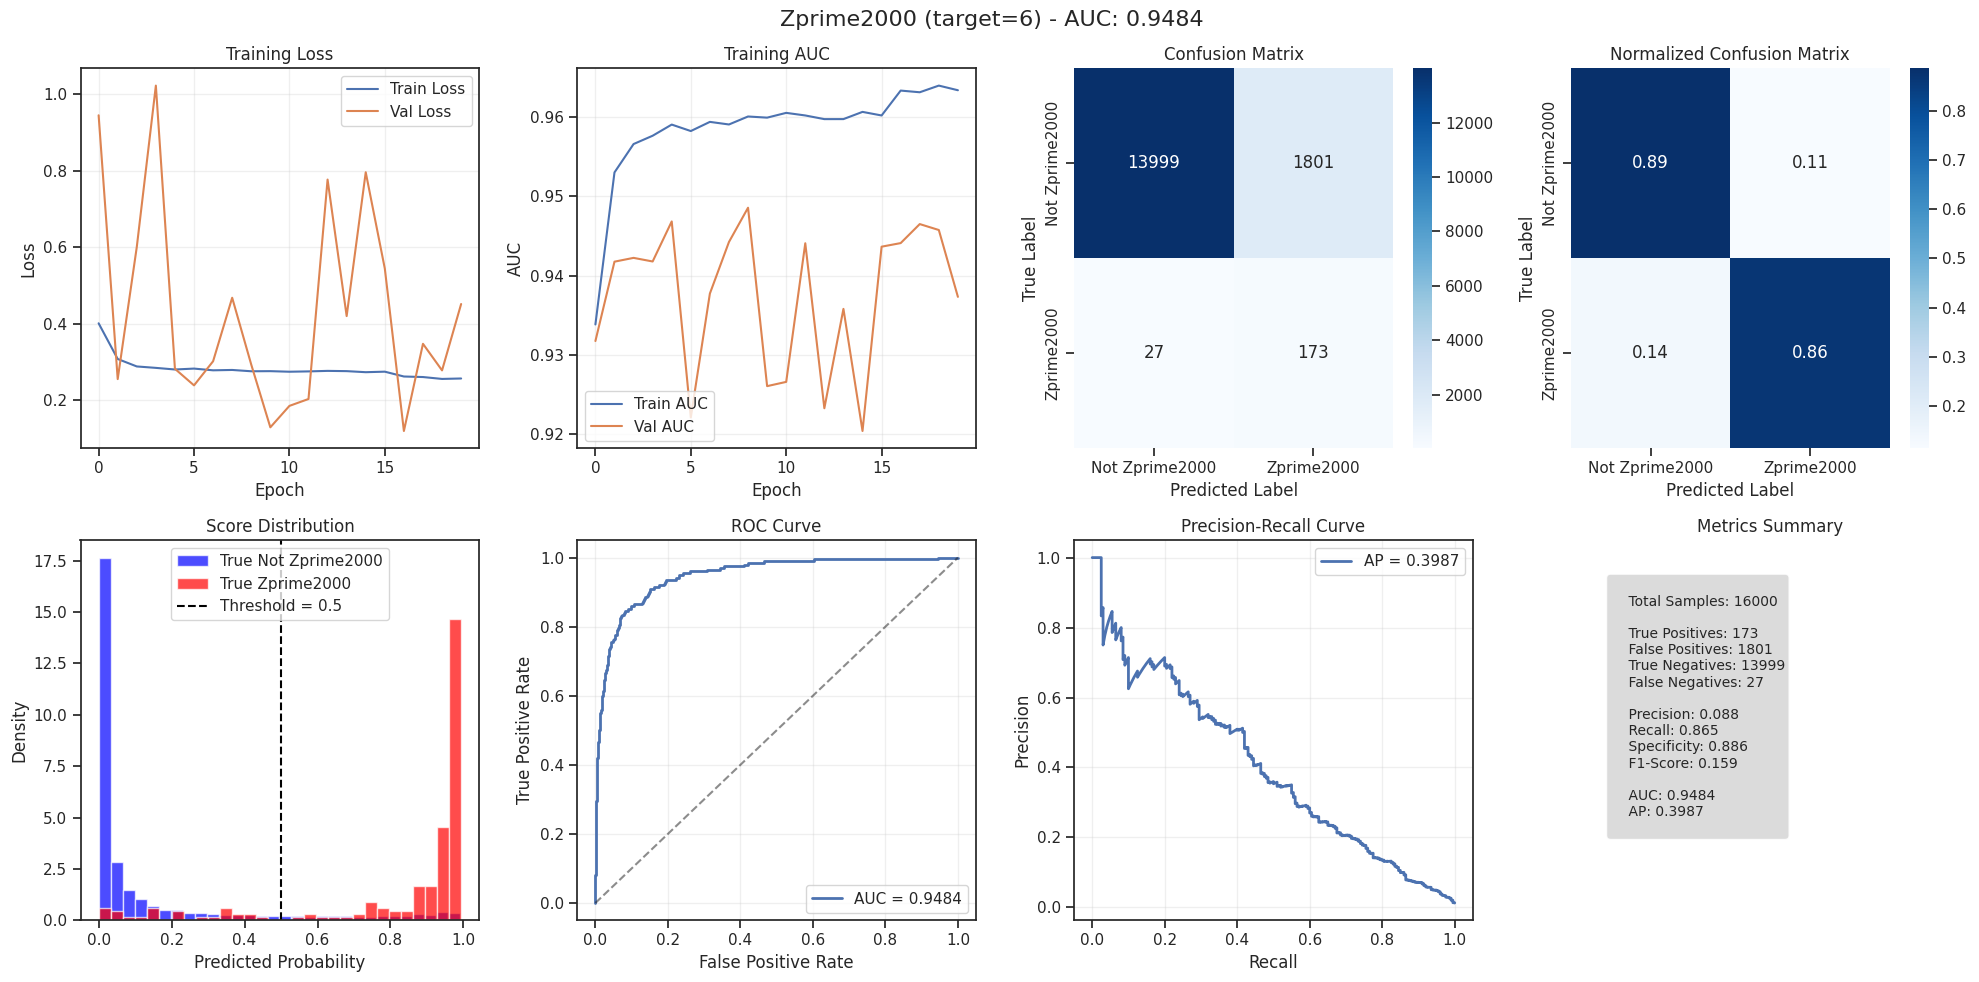


TRAINING BINARY CLASSIFIER FOR: Zprime750 (target=7)
Class distribution: {np.int64(0): np.int64(79000), np.int64(1): np.int64(1000)}
Training set shape: (64000, 84)
Test set shape: (16000, 84)
Training class distribution: [63200   800]
Test class distribution: [15800   200]
Applying SMOTE...
After SMOTE: [63200 63200]
Training model...
Epoch 1/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7572 - auc: 0.8288 - loss: 0.5873 - val_accuracy: 0.7806 - val_auc: 0.9070 - val_loss: 0.4976 - learning_rate: 0.0010
Epoch 2/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8543 - auc: 0.9203 - loss: 0.3902 - val_accuracy: 0.8084 - val_auc: 0.9231 - val_loss: 0.4252 - learning_rate: 0.0010
Epoch 3/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8601 - auc: 0.9258 - loss: 0.3688 - val_accuracy: 0.9071 - val_auc: 0.9079 - val_loss: 0.2481 - learning_rate: 0.0010
Epoch 4/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8634 - auc: 0.9290 - loss: 0.35

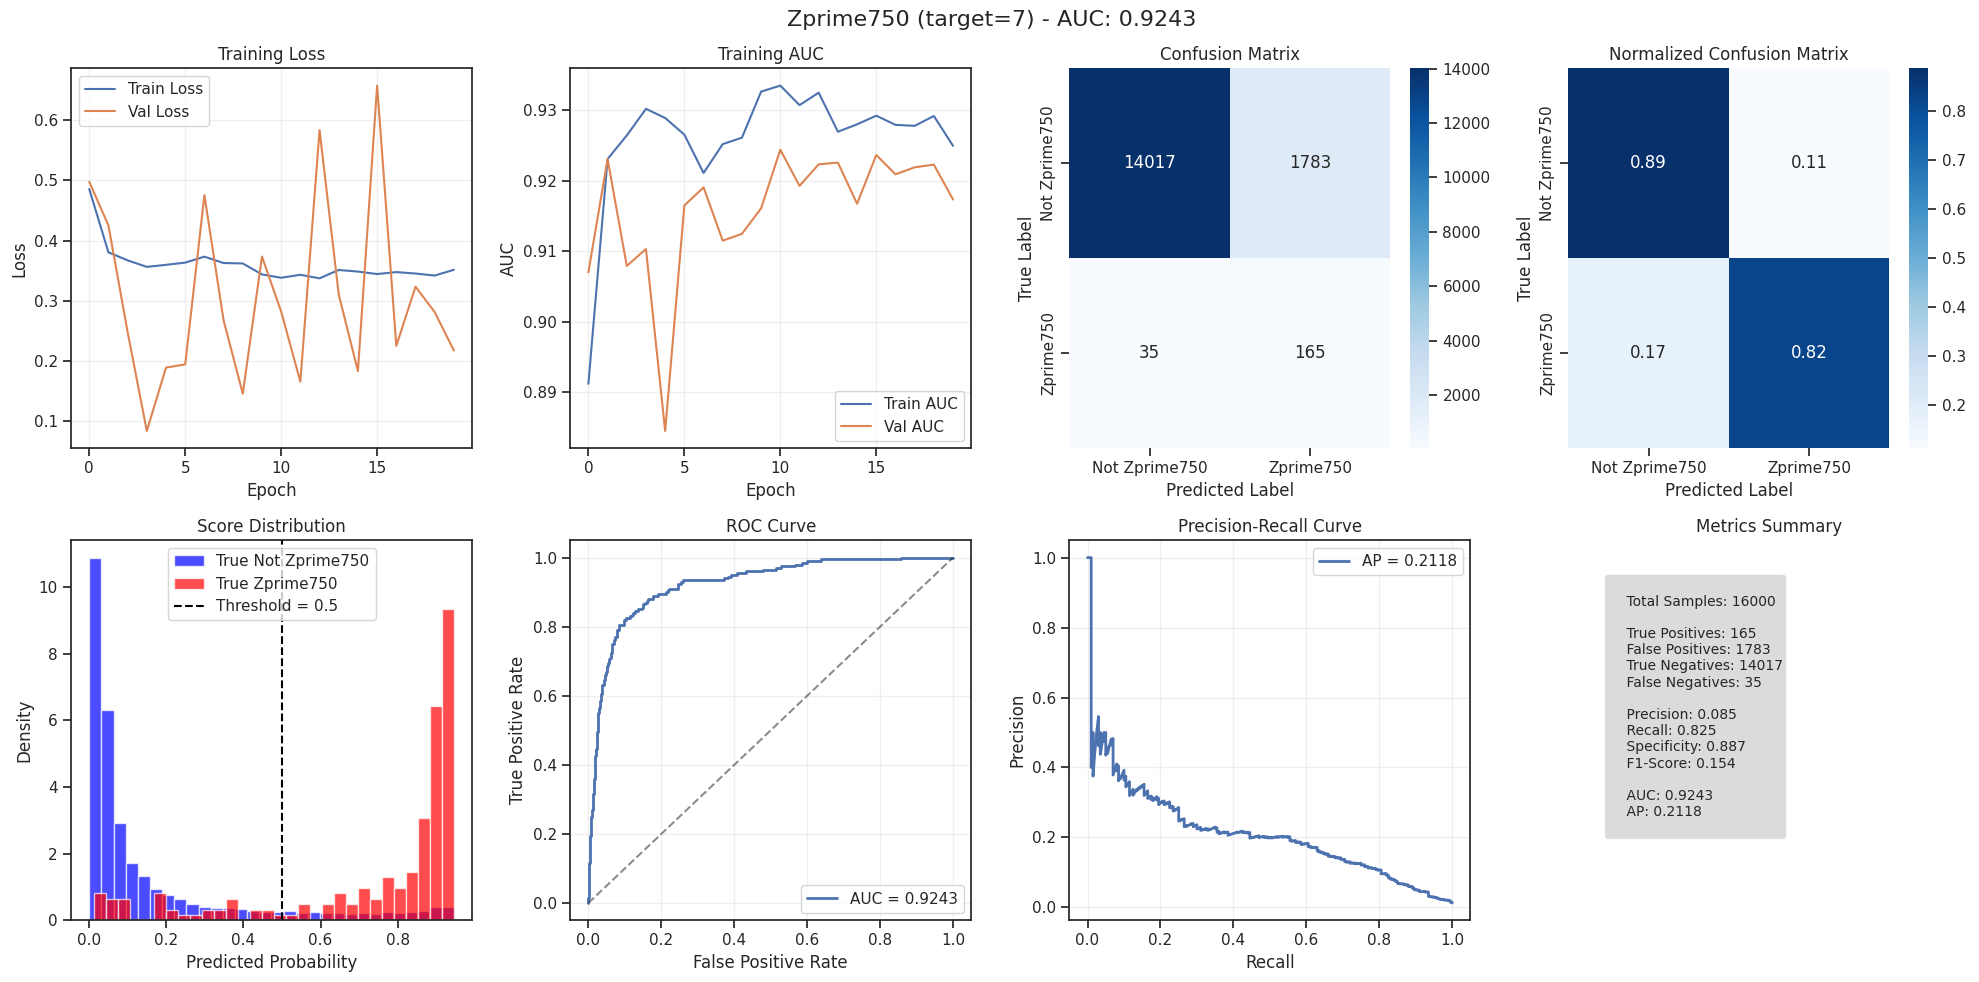


TRAINING BINARY CLASSIFIER FOR: singletop (target=8)
Class distribution: {np.int64(0): np.int64(74000), np.int64(1): np.int64(6000)}
Training set shape: (64000, 84)
Test set shape: (16000, 84)
Training class distribution: [59200  4800]
Test class distribution: [14800  1200]
Applying SMOTE...
After SMOTE: [59200 59200]
Training model...
Epoch 1/20
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.7035 - auc: 0.7644 - loss: 0.6713 - val_accuracy: 0.5878 - val_auc: 0.8928 - val_loss: 0.8689 - learning_rate: 0.0010
Epoch 2/20
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8127 - auc: 0.8831 - loss: 0.4751 - val_accuracy: 0.6771 - val_auc: 0.8851 - val_loss: 0.6723 - learning_rate: 0.0010
Epoch 3/20
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8167 - auc: 0.8878 - loss: 0.4490 - val_accuracy: 0.8976 - val_auc: 0.8742 - val_loss: 0.3295 - learning_rate: 0.0010
Epoch 4/20
3700/3700 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8210 - auc: 0.8903 - loss: 0.44

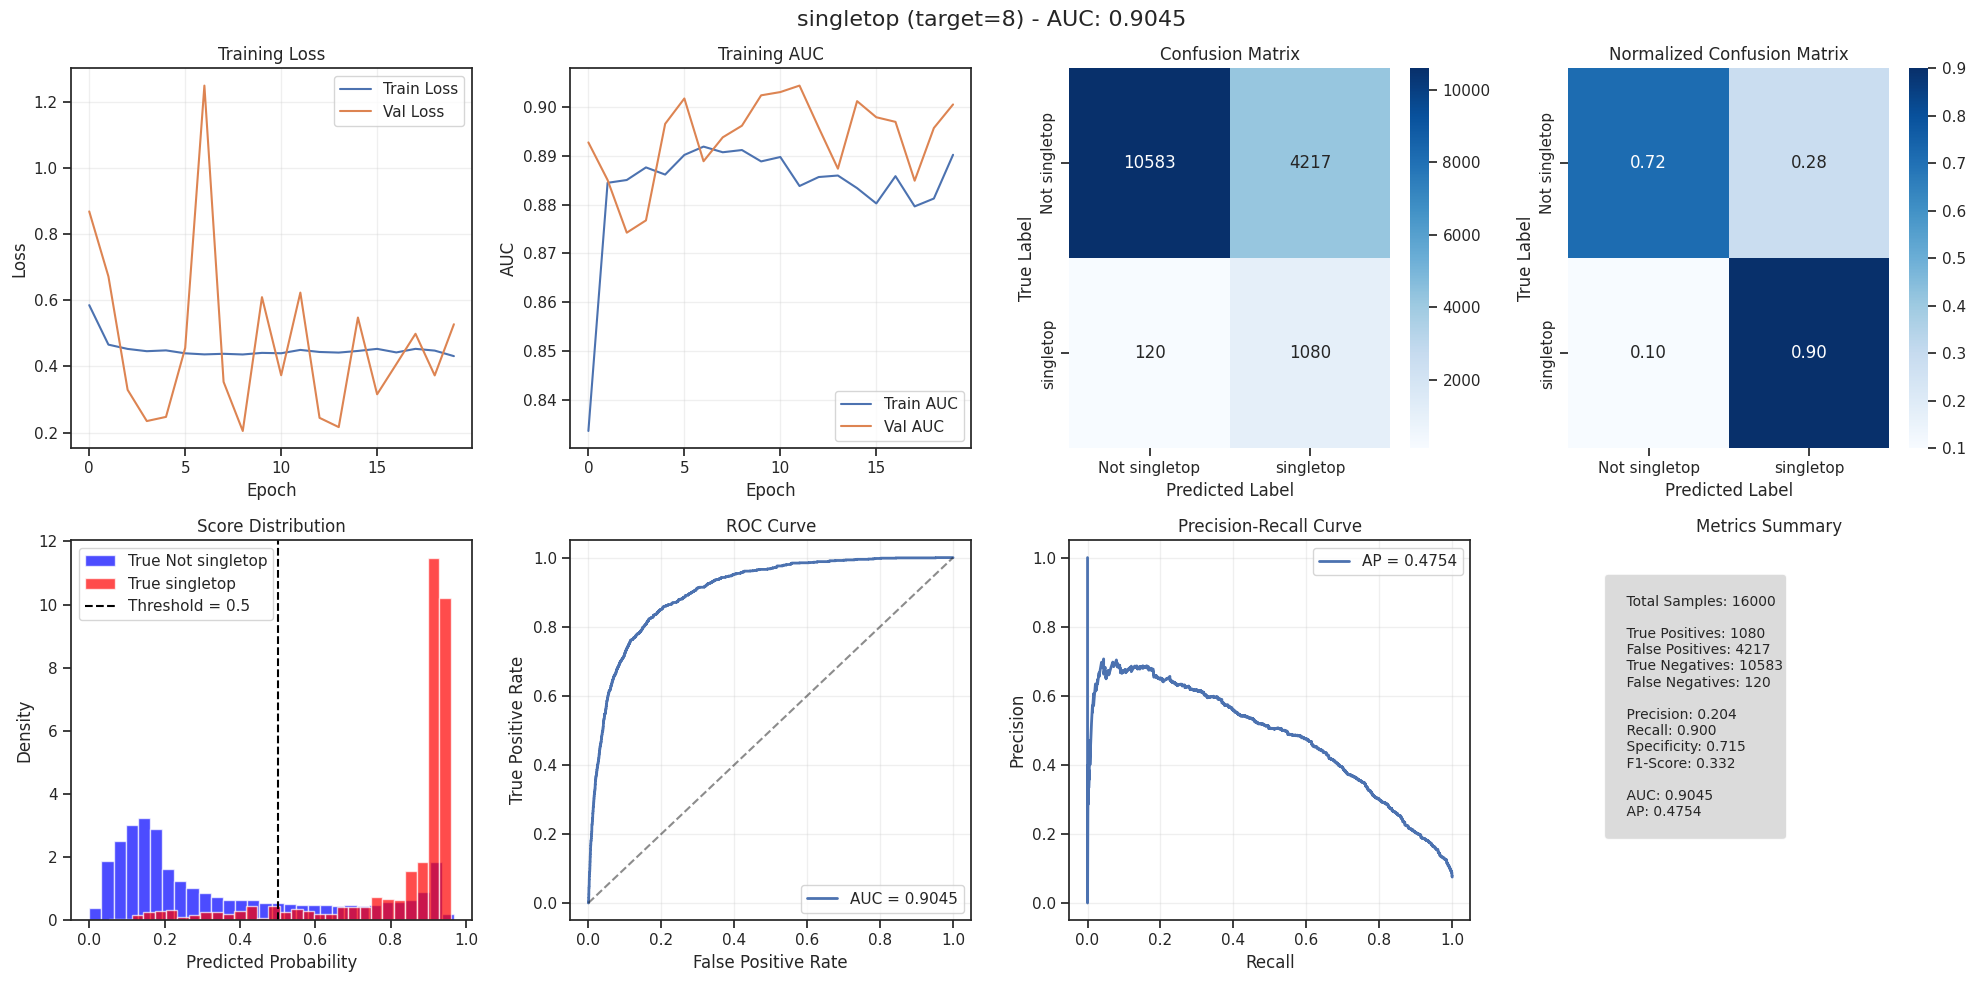


TRAINING BINARY CLASSIFIER FOR: ttbar (target=9)
Class distribution: {np.int64(0): np.int64(79000), np.int64(1): np.int64(1000)}
Training set shape: (64000, 84)
Test set shape: (16000, 84)
Training class distribution: [63200   800]
Test class distribution: [15800   200]
Applying SMOTE...
After SMOTE: [63200 63200]
Training model...
Epoch 1/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.7382 - auc: 0.8067 - loss: 0.6153 - val_accuracy: 0.8817 - val_auc: 0.8718 - val_loss: 0.2859 - learning_rate: 0.0010
Epoch 2/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8268 - auc: 0.8944 - loss: 0.4390 - val_accuracy: 0.7674 - val_auc: 0.8963 - val_loss: 0.4884 - learning_rate: 0.0010
Epoch 3/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8380 - auc: 0.9039 - loss: 0.4053 - val_accuracy: 0.9437 - val_auc: 0.8799 - val_loss: 0.1723 - learning_rate: 0.0010
Epoch 4/20
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8336 - auc: 0.8995 - loss: 0.4146 -

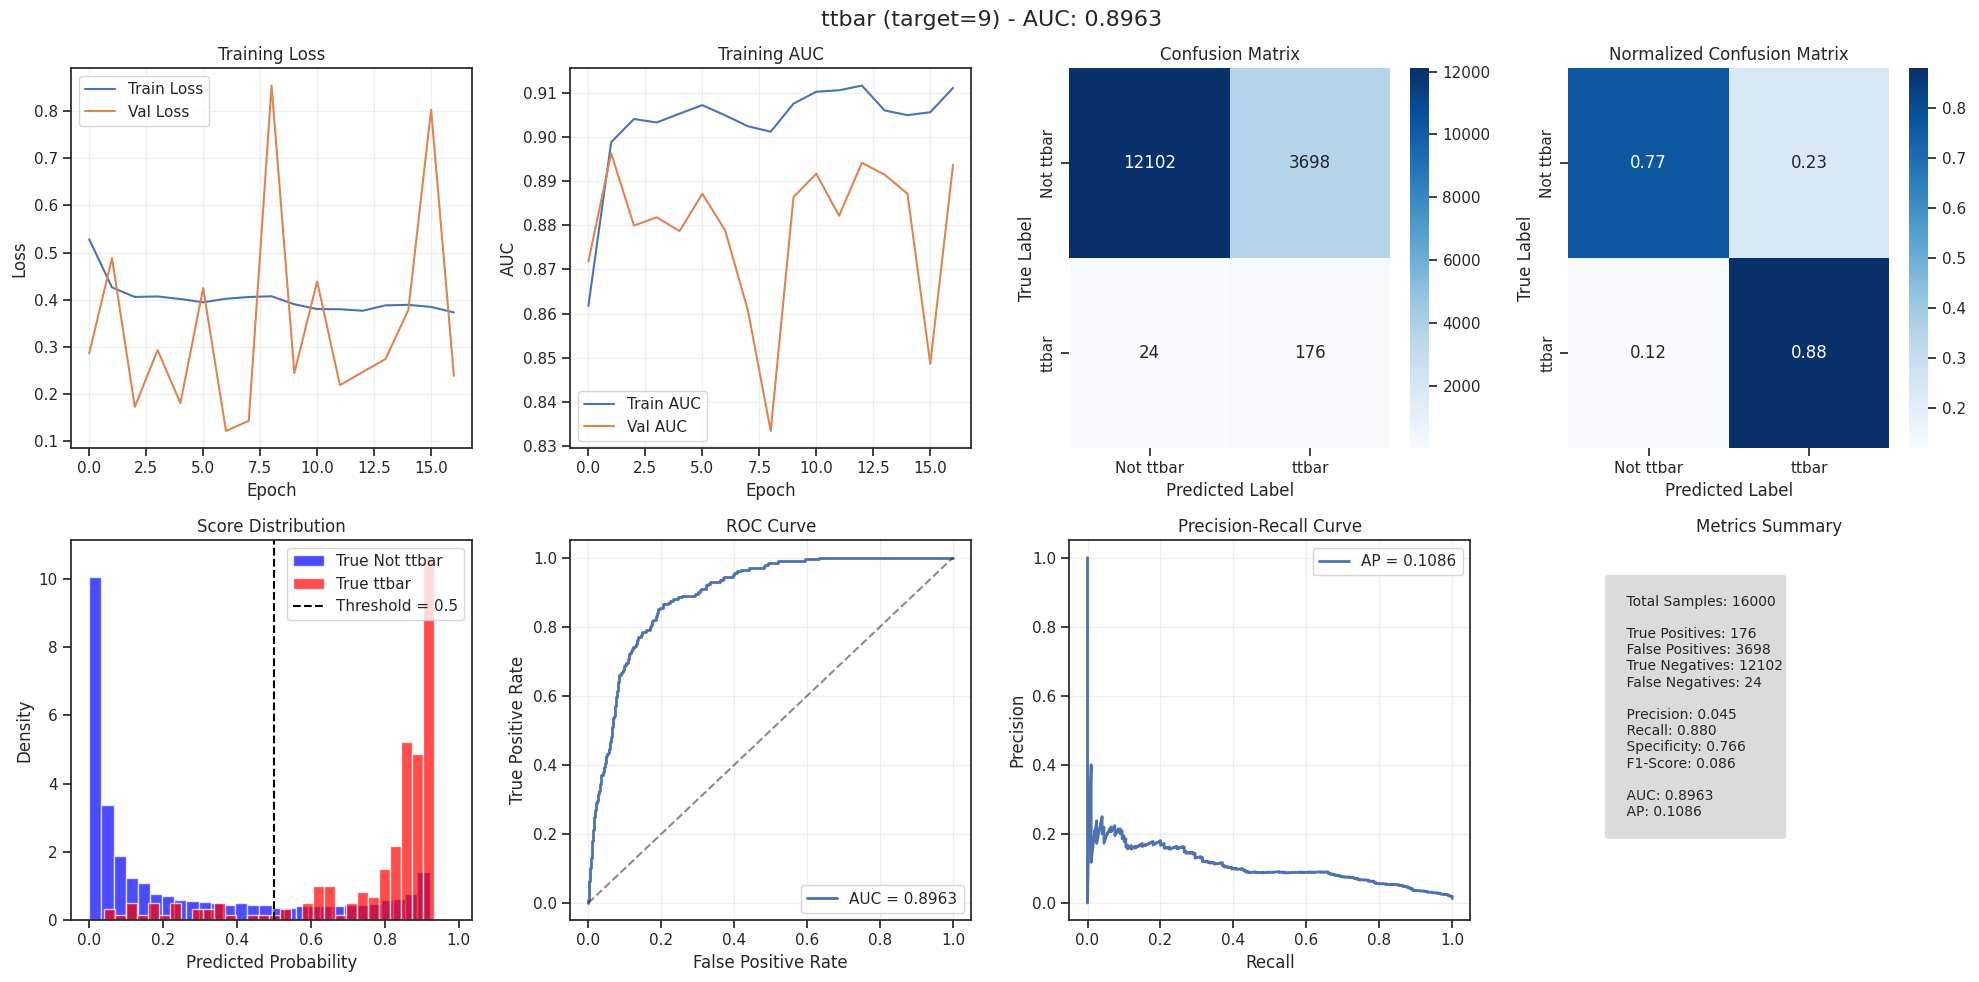


TRAINING SUMMARY
 target_value target_name  samples  auc_score  best_val_auc
            1          GG     4000   0.997576      0.997481
            0        C1N2     3000   0.984957      0.984856
            6  Zprime2000     1000   0.948374      0.948580
            7   Zprime750     1000   0.924345      0.924368
            5      ZPrime     1000   0.915322      0.914992
            8   singletop     6000   0.904489      0.904418
            9       ttbar     1000   0.896310      0.896302
            3           W    24000   0.818216      0.818327
            4           Z    32000   0.805390      0.805409
            2          VV     7000   0.757079      0.756934


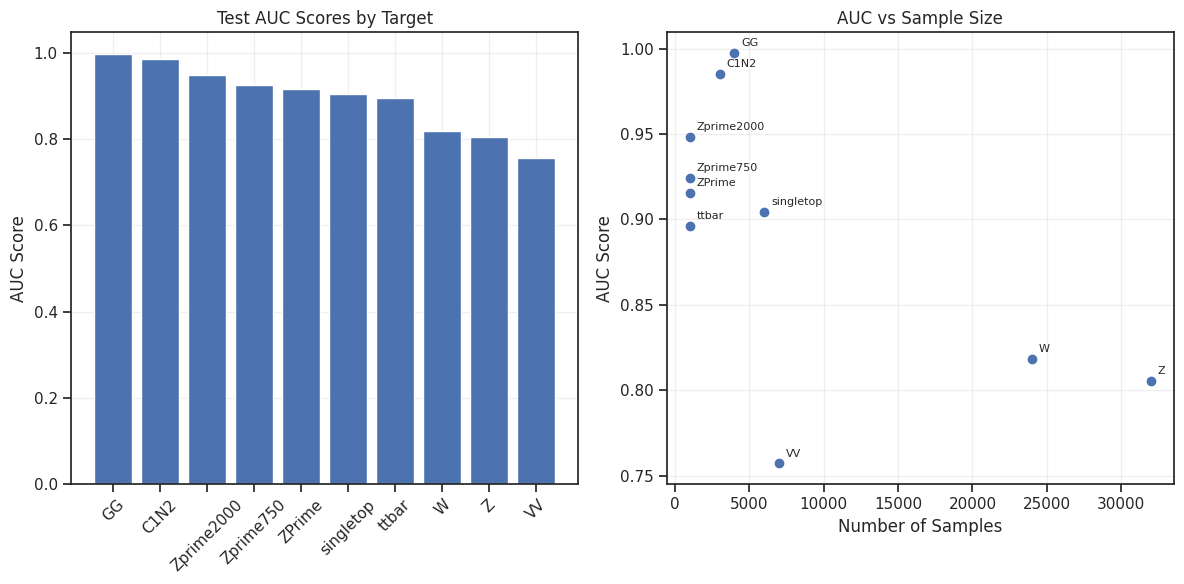

In [109]:
#NOTE : this is just a test to see if such approach would work. Rewrite properly later

import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def create_binary_model(input_shape, architecture=[64, 32, 16], dropout_rates=[0.5, 0.5, 0.0], 
                       learning_rate=0.001, l2_reg=0.001):
    """
    Create a binary classification model with configurable architecture
    """
    model = Sequential([Input(shape=(input_shape,))])
    
    for i, (units, dropout) in enumerate(zip(architecture, dropout_rates)):
        model.add(Dense(units, activation='relu', kernel_regularizer=l2(l2_reg)))
        model.add(BatchNormalization())
        if dropout > 0:
            model.add(Dropout(dropout))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', AUC(name='auc')]
    )
    
    return model

def train_binary_classifier(X, y, target_value, target_name, test_size=0.2, 
                           use_smote=True, epochs=50, batch_size=32,
                           patience=15, verbose=1):
    """
    Train a binary classifier for a specific target value
    
    Parameters:
    -----------
    X : array-like
        Feature matrix
    y : array-like
        Target vector with multiple classes
    target_value : int
        The specific target value to classify (vs all others)
    target_name : str
        Name of the target class for display
    test_size : float
        Fraction of data to use for testing
    use_smote : bool
        Whether to use SMOTE for balancing
    epochs : int
        Maximum training epochs
    batch_size : int
        Training batch size
    patience : int
        Early stopping patience
    verbose : int
        Verbosity level
        
    Returns:
    --------
    dict containing model, history, and evaluation results
    """
    
    print(f"\n{'='*60}")
    print(f"TRAINING BINARY CLASSIFIER FOR: {target_name} (target={target_value})")
    print(f"{'='*60}")
    
    # Create binary target
    y_binary = [1 if y[i] == target_value else 0 for i in range(len(y))]
    
    # Check class distribution
    unique, counts = np.unique(y_binary, return_counts=True)
    class_dist = dict(zip(unique, counts))
    print(f"Class distribution: {class_dist}")
    
    # Check if we have enough samples
    if class_dist.get(1, 0) < 10:
        print(f"WARNING: Only {class_dist.get(1, 0)} samples for {target_name}. Skipping...")
        return None
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=test_size, random_state=123, stratify=y_binary
    )
    
    # Convert to numpy arrays
    X_train_array = X_train.values if hasattr(X_train, 'values') else X_train
    X_test_array = X_test.values if hasattr(X_test, 'values') else X_test
    y_train_array = np.array(y_train)
    y_test_array = np.array(y_test)
    
    print(f"Training set shape: {X_train_array.shape}")
    print(f"Test set shape: {X_test_array.shape}")
    print(f"Training class distribution: {np.bincount(y_train_array)}")
    print(f"Test class distribution: {np.bincount(y_test_array)}")
    
    # Apply SMOTE if requested
    if use_smote and class_dist.get(1, 0) >= 5:  # Need at least 5 samples for SMOTE
        print("Applying SMOTE...")
        smote = SMOTE(random_state=123, k_neighbors=min(5, class_dist.get(1, 0)-1))
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train_array, y_train_array)
        print(f"After SMOTE: {np.bincount(y_train_balanced)}")
    else:
        print("Using original imbalanced data...")
        X_train_balanced, y_train_balanced = X_train_array, y_train_array
    
    # Create model
    model = create_binary_model(X_train_balanced.shape[1])
    
    # Callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_auc',
            patience=patience,
            restore_best_weights=True,
            mode='max',
            verbose=1 if verbose > 0 else 0
        ),
        ReduceLROnPlateau(
            monitor='val_auc',
            factor=0.5,
            patience=patience//2,
            mode='max',
            min_lr=1e-6,
            verbose=1 if verbose > 0 else 0
        )
    ]
    
    # Train model
    print("Training model...")
    history = model.fit(
        X_train_balanced, y_train_balanced.astype(float),
        validation_data=(X_test_array, y_test_array.astype(float)),
        epochs=epochs,
        callbacks=callbacks,
        batch_size=batch_size,
        verbose=verbose
    )
    
    # Get best validation AUC
    best_val_auc = max(history.history['val_auc'])
    print(f"Best validation AUC: {best_val_auc:.4f}")
    
    # Evaluate model
    y_pred_proba = model.predict(X_test_array, verbose=0).ravel()
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Calculate metrics
    cm = confusion_matrix(y_test_array, y_pred)
    fpr, tpr, _ = roc_curve(y_test_array, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Return results
    return {
        'model': model,
        'history': history,
        'target_value': target_value,
        'target_name': target_name,
        'X_test': X_test_array,
        'y_test': y_test_array,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'confusion_matrix': cm,
        'auc_score': roc_auc,
        'best_val_auc': best_val_auc,
        'class_distribution': class_dist
    }

def plot_model_evaluation(results, save_path=None):
    """
    Plot comprehensive evaluation for a single model
    """
    target_name = results['target_name']
    target_value = results['target_value']
    cm = results['confusion_matrix']
    y_test = results['y_test']
    y_pred_proba = results['y_pred_proba']
    auc_score = results['auc_score']
    history = results['history']
    
    # Create figure
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle(f'{target_name} (target={target_value}) - AUC: {auc_score:.4f}', 
                 fontsize=16, y=0.98)
    
    # 1. Training History
    plt.subplot(2, 4, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 4, 2)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Val AUC')
    plt.title('Training AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. Confusion Matrix
    plt.subplot(2, 4, 3)
    class_names = [f'Not {target_name}', target_name]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # 3. Normalized Confusion Matrix
    plt.subplot(2, 4, 4)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Normalized Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # 4. Prediction Score Distribution
    plt.subplot(2, 4, 5)
    plt.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, 
             label=f'True Not {target_name}', density=True, color='blue')
    plt.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, 
             label=f'True {target_name}', density=True, color='red')
    plt.axvline(x=0.5, color='black', linestyle='--', label='Threshold = 0.5')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.title('Score Distribution')
    plt.legend()
    
    # 5. ROC Curve
    plt.subplot(2, 4, 6)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 6. Precision-Recall Curve
    plt.subplot(2, 4, 7)
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ap_score = average_precision_score(y_test, y_pred_proba)
    plt.plot(recall, precision, label=f'AP = {ap_score:.4f}', linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 7. Metrics Summary
    plt.subplot(2, 4, 8)
    tn, fp, fn, tp = cm.ravel()
    metrics_text = f"""
    Total Samples: {len(y_test)}
    
    True Positives: {tp}
    False Positives: {fp}
    True Negatives: {tn}
    False Negatives: {fn}
    
    Precision: {tp/(tp+fp) if (tp+fp) > 0 else 0:.3f}
    Recall: {tp/(tp+fn) if (tp+fn) > 0 else 0:.3f}
    Specificity: {tn/(tn+fp) if (tn+fp) > 0 else 0:.3f}
    F1-Score: {2*tp/(2*tp+fp+fn) if (2*tp+fp+fn) > 0 else 0:.3f}
    
    AUC: {auc_score:.4f}
    AP: {ap_score:.4f}
    """
    plt.text(0.1, 0.9, metrics_text, transform=plt.gca().transAxes,
             verticalalignment='top', fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    plt.axis('off')
    plt.title('Metrics Summary')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(f"{save_path}_{target_name}_evaluation.png", 
                   dpi=300, bbox_inches='tight')
    
    plt.show()

def train_all_targets(X, y, target_mapping=None, min_samples=50, save_plots=False, epochs=50):  # ← Add epochs parameter
    """
    Train binary classifiers for all targets with sufficient samples
    
    Parameters:
    -----------
    X : DataFrame or array
        Feature matrix
    y : array
        Target vector
    target_mapping : dict, optional
        Mapping of target values to names
    min_samples : int
        Minimum number of samples required to train a model
    save_plots : bool
        Whether to save evaluation plots
    epochs : int
        Number of training epochs
        
    Returns:
    --------
    dict of results for each target
    """
    
    # Get target distribution
    unique_targets, counts = np.unique(y, return_counts=True)
    target_dist = dict(zip(unique_targets, counts))
    
    print("Target Distribution:")
    for target, count in target_dist.items():
        name = target_mapping.get(target, f"Class_{target}") if target_mapping else f"Class_{target}"
        print(f"  {name} (target={target}): {count} samples")
    
    # Filter targets with sufficient samples
    valid_targets = [target for target, count in target_dist.items() 
                    if count >= min_samples]
    
    print(f"\nTraining models for {len(valid_targets)} targets with >= {min_samples} samples")
    print(f"Valid targets: {valid_targets}")
    
    # Train models
    all_results = {}
    summary_results = []
    
    for target_value in valid_targets:
        target_name = target_mapping.get(target_value, f"Class_{target_value}") if target_mapping else f"Class_{target_value}"
        
        # Train model
        results = train_binary_classifier(
            X=X, 
            y=y, 
            target_value=target_value,
            target_name=target_name,
            use_smote=True,
            epochs=epochs,  # ← Pass epochs parameter here
            verbose=1
        )
        
        if results is not None:
            # Store results
            all_results[target_value] = results
            
            # Plot evaluation
            print(f"\nPlotting evaluation for {target_name}...")
            plot_model_evaluation(results, 
                                save_path="model_evaluation" if save_plots else None)
            
            # Collect summary
            summary_results.append({
                'target_value': target_value,
                'target_name': target_name,
                'samples': target_dist[target_value],
                'auc_score': results['auc_score'],
                'best_val_auc': results['best_val_auc']
            })
    
    # Print summary
    print(f"\n{'='*80}")
    print("TRAINING SUMMARY")
    print(f"{'='*80}")
    
    summary_df = pd.DataFrame(summary_results)
    summary_df = summary_df.sort_values('auc_score', ascending=False)
    
    print(summary_df.to_string(index=False))
    
    # Plot summary
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.bar(range(len(summary_df)), summary_df['auc_score'])
    plt.xticks(range(len(summary_df)), summary_df['target_name'], rotation=45)
    plt.ylabel('AUC Score')
    plt.title('Test AUC Scores by Target')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.scatter(summary_df['samples'], summary_df['auc_score'])
    for i, row in summary_df.iterrows():
        plt.annotate(row['target_name'], 
                    (row['samples'], row['auc_score']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    plt.xlabel('Number of Samples')
    plt.ylabel('AUC Score')
    plt.title('AUC vs Sample Size')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return all_results, summary_df

# Now your call will work:
all_models, summary = train_all_targets(
    X=X, 
    y=y, 
    target_mapping=target_to_name,
    min_samples=50,
    save_plots=False, 
    epochs=20  # ← This will work now
)

### Saving models

In [115]:
import os
import pickle
from datetime import datetime

# Create models directory in your working directory
models_dir = "models"
os.makedirs(models_dir, exist_ok=True)

# Create timestamped subdirectory
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
save_dir = os.path.join(models_dir, f"physics_models_{timestamp}")
os.makedirs(save_dir, exist_ok=True)

print(f"Saving models to: {save_dir}")

# Save each model using the new .keras format
for target_value, results in all_models.items():
    target_name = results['target_name']
    
    # Save Keras model with .keras extension (new format)
    model_filename = os.path.join(save_dir, f"model_{target_name}_target{target_value}.keras")
    results['model'].save(model_filename)  # This will use the new format automatically
    print(f"Saved model: {target_name}")

# Save summary DataFrame as CSV
summary_filename = os.path.join(save_dir, "training_summary.csv")
summary.to_csv(summary_filename, index=False)
print(f"Saved summary: training_summary.csv")

# Save metadata
models_metadata = {}
for target_value, results in all_models.items():
    models_metadata[target_value] = {
        'target_name': results['target_name'],
        'target_value': results['target_value'],
        'auc_score': results['auc_score'],
        'best_val_auc': results['best_val_auc'],
        'class_distribution': results['class_distribution']
    }

metadata_filename = os.path.join(save_dir, "models_metadata.pkl")
with open(metadata_filename, 'wb') as f:
    pickle.dump(models_metadata, f)
print(f"Saved metadata: models_metadata.pkl")

# Save complete results
complete_results_filename = os.path.join(save_dir, "all_models_complete.pkl")
with open(complete_results_filename, 'wb') as f:
    pickle.dump(all_models, f)
print(f"Saved complete results: all_models_complete.pkl")

print(f"\nAll files saved to: {save_dir}")
print("Contents:")
for file in os.listdir(save_dir):
    file_path = os.path.join(save_dir, file)
    size_mb = os.path.getsize(file_path) / (1024*1024)
    print(f"  {file} ({size_mb:.2f} MB)")

Saving models to: models/physics_models_20250620_233707
Saved model: C1N2
Saved model: GG
Saved model: VV
Saved model: W
Saved model: Z
Saved model: ZPrime
Saved model: Zprime2000
Saved model: Zprime750
Saved model: singletop
Saved model: ttbar
Saved summary: training_summary.csv
Saved metadata: models_metadata.pkl
Saved complete results: all_models_complete.pkl

All files saved to: models/physics_models_20250620_233707
Contents:
  model_ttbar_target9.keras (0.15 MB)
  model_Z_target4.keras (0.15 MB)
  all_models_complete.pkl (107.07 MB)
  model_ZPrime_target5.keras (0.15 MB)
  model_Zprime2000_target6.keras (0.15 MB)
  training_summary.csv (0.00 MB)
  model_VV_target2.keras (0.15 MB)
  model_GG_target1.keras (0.15 MB)
  model_singletop_target8.keras (0.15 MB)
  model_W_target3.keras (0.15 MB)
  models_metadata.pkl (0.00 MB)
  model_Zprime750_target7.keras (0.15 MB)
  model_C1N2_target0.keras (0.15 MB)


### LOAD

In [116]:
from tensorflow.keras.models import load_model

def load_all_models(save_dir):
    """
    Load all saved models from a directory (supports both .h5 and .keras formats)
    """
    if not os.path.exists(save_dir):
        print(f"Directory {save_dir} does not exist!")
        return None
    
    # Find all model files (.keras or .h5)
    model_files = [f for f in os.listdir(save_dir) if f.startswith('model_') and (f.endswith('.keras') or f.endswith('.h5'))]
    
    loaded_models = {}
    
    for model_file in model_files:
        # Extract target info from filename
        if model_file.endswith('.keras'):
            parts = model_file.replace('model_', '').replace('.keras', '').split('_target')
        else:  # .h5 format
            parts = model_file.replace('model_', '').replace('.h5', '').split('_target')
            
        target_name = parts[0]
        target_value = int(parts[1])
        
        # Load model
        model_path = os.path.join(save_dir, model_file)
        model = load_model(model_path)
        
        # Load metadata if available
        metadata_file = f"metadata_{target_name}_target{target_value}.pkl"
        metadata_path = os.path.join(save_dir, metadata_file)
        
        metadata = {}
        if os.path.exists(metadata_path):
            with open(metadata_path, 'rb') as f:
                metadata = pickle.load(f)
        
        loaded_models[target_value] = {
            'model': model,
            'target_name': target_name,
            'target_value': target_value,
            'metadata': metadata
        }
        
        print(f"Loaded: {target_name} (target={target_value})")
    
    print(f"Successfully loaded {len(loaded_models)} models")
    return loaded_models

# Example usage:
# loaded_models = load_all_models("models/physics_models_20250620_233550")

In [120]:
loaded_models = load_all_models("models/physics_models_20250620_233707")
loaded_models

/home/hamza/venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Loaded: ttbar (target=9)
Loaded: Z (target=4)
Loaded: ZPrime (target=5)
Loaded: Zprime2000 (target=6)
Loaded: VV (target=2)
Loaded: GG (target=1)
Loaded: singletop (target=8)
Loaded: W (target=3)
Loaded: Zprime750 (target=7)
Loaded: C1N2 (target=0)
Successfully loaded 10 models


{9: {'model': <Sequential name=sequential_44, built=True>,
  'target_name': 'ttbar',
  'target_value': 9,
  'metadata': {}},
 4: {'model': <Sequential name=sequential_39, built=True>,
  'target_name': 'Z',
  'target_value': 4,
  'metadata': {}},
 5: {'model': <Sequential name=sequential_40, built=True>,
  'target_name': 'ZPrime',
  'target_value': 5,
  'metadata': {}},
 6: {'model': <Sequential name=sequential_41, built=True>,
  'target_name': 'Zprime2000',
  'target_value': 6,
  'metadata': {}},
 2: {'model': <Sequential name=sequential_37, built=True>,
  'target_name': 'VV',
  'target_value': 2,
  'metadata': {}},
 1: {'model': <Sequential name=sequential_36, built=True>,
  'target_name': 'GG',
  'target_value': 1,
  'metadata': {}},
 8: {'model': <Sequential name=sequential_43, built=True>,
  'target_name': 'singletop',
  'target_value': 8,
  'metadata': {}},
 3: {'model': <Sequential name=sequential_38, built=True>,
  'target_name': 'W',
  'target_value': 3,
  'metadata': {}},
 7: 